# RQ1 : analisi worker

## Setup

### Importo le librerie che mi serviranno

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

### Setup dati

In [2]:
# cartella dove ci sono i dati da analizzare
folder = "../setup_dati/"

carico i vari dataframe

In [3]:

# dataframe totale

df_all = pd.read_csv(folder+"df_all_data.csv", sep=',').drop(columns=['Unnamed: 0'])
df_all["doc_index"] = df_all["doc_index"].apply(str)


In [4]:
df_all

worker_id  paid                   task_id     batch_name  \
0     55b645b1fdf99b1c02906872  True  FakeNewsMultidimensional  V4-Prolific-1   
1     55b645b1fdf99b1c02906872  True  FakeNewsMultidimensional  V4-Prolific-1   
2     55b645b1fdf99b1c02906872  True  FakeNewsMultidimensional  V4-Prolific-1   
3     55b645b1fdf99b1c02906872  True  FakeNewsMultidimensional  V4-Prolific-1   
4     55b645b1fdf99b1c02906872  True  FakeNewsMultidimensional  V4-Prolific-1   
...                        ...   ...                       ...            ...   
1194  6301b7caed960c3930057c7a  True  FakeNewsMultidimensional  V4-Prolific-1   
1195  6301b7caed960c3930057c7a  True  FakeNewsMultidimensional  V4-Prolific-1   
1196  6301b7caed960c3930057c7a  True  FakeNewsMultidimensional  V4-Prolific-1   
1197  6301b7caed960c3930057c7a  True  FakeNewsMultidimensional  V4-Prolific-1   
1198  6301b7caed960c3930057c7a  True  FakeNewsMultidimensional  V4-Prolific-1   

       unit_id  try_last  try_current  action                    time_submit  \
0     unit_145         1            1    Next  Tue, 23 Aug 2022 12:21:27 GMT   
1     unit_145         1            1  Finish  Tue, 23 Aug 2022 12:23:46 GMT   
2     unit_145         1            1    Next  Tue, 23 Aug 2022 12:02:59 GMT   
3     unit_145         1            1    Next  Tue, 23 Aug 2022 12:09:17 GMT   
4     unit_145         1            1    Next  Tue, 23 Aug 2022 12:12:09 GMT   
...        ...       ...          ...     ...                            ...   
1194   unit_75         1            1    Next  Tue, 23 Aug 2022 10:57:48 GMT   
1195   unit_75         1            1    Next  Tue, 23 Aug 2022 11:00:57 GMT   
1196   unit_75         1            1    Next  Tue, 23 Aug 2022 11:06:10 GMT   
1197   unit_75         1            1    Next  Tue, 23 Aug 2022 11:09:15 GMT   
1198   unit_75         1            1    Next  Tue, 23 Aug 2022 11:12:17 GMT   

             time_submit_parsed  ... doc_time_start  doc_time_end  \
0     2022-08-23 12:21:27 00:00  ...   1.661257e+09  1.661257e+09   
1     2022-08-23 12:23:46 00:00  ...   1.661257e+09  1.661257e+09   
2     2022-08-23 12:02:59 00:00  ...   1.661256e+09  1.661256e+09   
3     2022-08-23 12:09:17 00:00  ...   1.661256e+09  1.661256e+09   
4     2022-08-23 12:12:09 00:00  ...   1.661256e+09  1.661256e+09   
...                         ...  ...            ...           ...   
1194  2022-08-23 10:57:48 00:00  ...   1.661252e+09  1.661252e+09   
1195  2022-08-23 11:00:57 00:00  ...   1.661252e+09  1.661252e+09   
1196  2022-08-23 11:06:10 00:00  ...   1.661252e+09  1.661252e+09   
1197  2022-08-23 11:09:15 00:00  ...   1.661252e+09  1.661252e+09   
1198  2022-08-23 11:12:17 00:00  ...   1.661252e+09  1.661253e+09   

     global_outcome  global_form_validity gold_checks time_spent_check  \
0              True                  True        True             True   
1              True                  True        True             True   
2              True                  True        True             True   
3              True                  True        True             True   
4              True                  True        True             True   
...             ...                   ...         ...              ...   
1194           True                  True        True             True   
1195           True                  True        True             True   
1196           True                  True        True             True   
1197           True                  True        True             True   
1198           True                  True        True             True   

     time_check_amount       quartile mean          sovra  
0                 True          other  3.4          other  
1                 True          other  1.4          other  
2                 True  correct_false  1.2  pants-on-fire  
3                 True          other  2.6          other  
4                 True          other  2.7          other  
...      

## Funzioni che mi serviranno 

### Funzione per visualizzare il dataframe

In [5]:
colonne_da_NON_visualizzare = ['unit_id','worker_id', 'paid', 'batch_name', 'try_last',
       'try_current', 'action', 'time_submit', 'time_submit_parsed',
       'doc_fact_check_source',
       'doc_speaker_name', 
       'doc_statement_description', 'doc_evidence_url',
       'doc_completeness_value', 'doc_completeness_label',
       'doc_completeness_index', 'doc_completeness_description',
       'doc_comprehensibility_value', 'doc_comprehensibility_label',
       'doc_comprehensibility_index', 'doc_comprehensibility_description',
       'doc_precision_value', 'doc_precision_label', 'doc_precision_index',
       'doc_precision_description', 'doc_informativeness_value',
       'doc_informativeness_label', 'doc_informativeness_index',
       'doc_informativeness_description', 'doc_unbiasedness_value',
       'doc_unbiasedness_label', 'doc_unbiasedness_index',
       'doc_unbiasedness_description', 'doc_accuracy_value',
       'doc_accuracy_label', 'doc_accuracy_index', 'doc_accuracy_description',
       "doc_speaker's-trustworthiness_value",
       "doc_speaker's-trustworthiness_label",
       "doc_speaker's-trustworthiness_index",
       "doc_speaker's-trustworthiness_description", 'doc_truthfulness_value',
       'doc_truthfulness_label', 'doc_truthfulness_index',
       'doc_truthfulness_description', 'doc_confidence_value',
       'doc_confidence_label', 'doc_confidence_index',
       'doc_confidence_description', 'doc_accesses', 'doc_time_elapsed',
       'doc_time_start', 'doc_time_end', 'global_outcome',
       'global_form_validity', 'gold_checks', 'time_spent_check',
       'time_check_amount',"task_id"]


def visualizza_dataframe(df=df_all,n=10):
       display(df.drop(colonne_da_NON_visualizzare, axis=1).head(n))

funzioni per avere solo true e false

In [6]:
def visualizza_dataframe_true(df=df_all,n=10):
       display(df[df["doc_fact_check_ground_truth_label"]=="true"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_false(df=df_all,n=10):
       display(df[df["doc_fact_check_ground_truth_label"]=="pants-on-fire"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

In [7]:
def visualizza_dataframe_correct_false(df=df_all,n=10):
       display(df[df["quartile"]=="correct_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_correct_true(df=df_all,n=10):
       display(df[df["quartile"]=="correct_true"].drop(colonne_da_NON_visualizzare, axis=1).head(n))
       
def visualizza_dataframe_wrong_false(df=df_all,n=10):
       display(df[df["quartile"]=="wrong_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_correct_false(df=df_all,n=10):
       display(df[df["quartile"]=="correct_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

### Funzioni per il test di significatività

     test di Mann-Whitney u
     
Il test di Mann-Whitney U è un test non parametrico utilizzato per confrontare due campioni indipendenti e stabilire se esiste una differenza significativa tra di essi. In particolare, il test viene utilizzato per verificare se le mediane dei due campioni sono significativamente diverse.

In [8]:
from scipy.stats import mannwhitneyu

In [9]:
# group1 e group2 sono due liste di valori
# ritorna p-value => se p-value < 0.05 allora la mediana è significativamente diversa

def test_mann_whitney_u(group1,group2):
    stat, p = mannwhitneyu(group1, group2)
    return p

    prop test => test di differenza tra due porzioni
Valuta se delle proporzioni sono uguali (p1 = p2 = p3 = .. pk) => ipotesi nulla o se esite una proporzioni significativamente diversa salle altre (ipotesi alternativa) 

In [10]:
import statsmodels.stats.proportion as ssp

In [11]:
# si applica a una specifica dimensione e si passa in input le frequenze assolute di ogni valore della dimensione

# count = particolare (wt/wf/mt/mf)
# nobs = totale di riferimento (true / false)
# ritorna p-value => se p-value < 0.05 allora c'è una proporzione significativamente diversa

def prop_test(count,nobs):
    (chi2, p, arr) = ssp.proportions_chisquare(count,nobs)
    return p

In [12]:
def prop_test_all(count,nobs):
    test_results  = ssp.proportions_chisquare_allpairs(count, nobs, multitest_method='b')
    return test_results 

    p trend test => test 
permette di verificare la presenza di una tendenza lineare tra le proporzioni(l’ipotesi nulla è che non vi sia alcuna tendenza tra di esse; l’alternativa è che vi sia un aumento/decremento lineare della proporzione man mano che si sale/scende nelle categorie. Questo test è da eseguire solo se la variabile categoriale considerata è ordinale.)

In [13]:
from scipy.stats import pearsonr

In [14]:
# tred test

def tred_test(count,nobs):
    corr, pval = corr, pval = pearsonr(count,nobs)
    return pval

### Funzioni per plot di grafici

In [15]:
# imposto dimensione delle figure e stile
custom_params = {"axes.spines.right": False, "axes.spines.top": False,'figure.figsize':(4.7,3.27)}
sns.set_theme(style="ticks", rc=custom_params)


    funzione per generare strip plot (solo puntini) con:
- y = mean della correttezza
- x = quartili
- colori = valori di una dimensione (considerata)

In [16]:
# df_sovra = True o False
# dimensione = dimensione considerata

def plot_strip_plot(df, dimensione, x_value, x_filter = None, y_value = "mean", valori_dimensione = None, order = None):
   
    if order == None:
       order = list(df[x_value].unique())
    
    if valori_dimensione is not None:
        
        tutti = df[dimensione].unique()
        da_tenere = []
        for val in tutti:
            if val not in valori_dimensione:
                da_tenere.append(val) 
                
        for val in da_tenere:
            df = df.loc[df[dimensione] != val]
    
    
    if x_filter is not None:
        diff = order.copy()
        for val in x_filter:
            
            diff.remove(val)
        for val in diff:
            df = df.loc[df[x_value] != val]
            order.remove(val)
    
    ax = sns.stripplot(y=y_value, x=x_value, data=df, hue=dimensione ,jitter=0.1, size=8, order=order, palette="Set2")
    # show the graph
    plt.title(dimensione+" "+x_value, loc="center")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax.tick_params(axis='x', rotation=60)
    plt.show()

    funzione per generare un boxplot + stripplot di una dimensione di interesse:
- y = dimensione di interesse
- x = quartitli (wt,wf,ct,wt)

In [17]:
def plot_boxplot(df, dimensione):

    ax = sns.boxplot(palette = "deep",x="quartile", y=dimensione, data=df,order=['wrong_false','correct_false', 'wrong_true','correct_true'])
    
    ax = sns.stripplot(palette = ["black"],x="quartile", y=dimensione, data=df, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])

    # add title
    plt.title(dimensione, loc="left")
    # show the graph
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

    funzione per creare barplot di confronto

In [18]:

from matplotlib.colors import to_rgba

def crea_barplot(raccoglitore_dimensioni,dimensione):

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

    fig.tight_layout(pad=5.0)
    
    for quartile in quartili:
        
        sub = raccoglitore_dimensioni[dimensione][quartile].sort_values("valore", ascending=False)
        sub_freq_rel = []
        for index, row in sub.iterrows():
            for col in ["freq_rel_quartile", "freq_rel_sovra", "freq_rel_all"]:
                #new_row = [row["valore"],col, sub.at[index,col]]
                new_row = [row["label"],col, sub.at[index,col]]
                sub_freq_rel.append(new_row)

        sub_freq_rel = pd.DataFrame(sub_freq_rel, columns=["valore", "colonna", "frequenza"])
        sub_freq_rel = sub_freq_rel.sort_values(by=["valore"], ascending=True)
        
        if quartile == "wrong_false":
            i = 0
            j = 0
        elif quartile == "wrong_true":
            i = 0
            j = 1
        elif quartile == "correct_false":
            i = 1
            j = 0
        elif quartile == "correct_true":
            i = 1
            j = 1
            
        '''    
        color_dict = {'freq_rel_quartile': to_rgba('cornflowerblue', 1),
                    'freq_rel_sovra': to_rgba('grey', 0.2),
                    'freq_rel_all': to_rgba('magenta', 0.2)}   
        ''' 
        
        #sns.barplot(data=sub_freq_rel, y = "frequenza", x = "valore", hue ="colonna", orient="v", ax=ax[i,j], palette=["g","indianred", "goldenrod"])   
        sns.barplot(data=sub_freq_rel,y = "valore", x = "frequenza", hue ="colonna", ax=ax[i,j], palette=["g","indianred", "goldenrod"])   
        
        aplha_value = 0.35
        
        for bar, alpha in zip(ax[i,j].containers[2], list(aplha_value*np.ones(len(sub_freq_rel["valore"])))):
            bar.set_alpha(alpha)
        for bar, alpha in zip(ax[i,j].containers[0], list(aplha_value*np.ones(len(sub_freq_rel["valore"])))):
            bar.set_alpha(alpha)
        
        ax[i,j].set_title(dimensione + " " + quartile)
    
    # sistemo legende
    for i in range(2):
        for j in range(2):
            if i == 1 and j == 1:
                ax[i,j].legend(bbox_to_anchor=(1.1, 0.35), loc='upper left', borderaxespad=0)
            else:
                ax[i,j].get_legend().remove()
        
    
   
    plt.show()

     funzione per creare box plot + stripplot

In [19]:
def crea_boxplot_e_stripplot(df, x_dimensione, y_dimensione, order = ['wrong_false','other_false','correct_false', 'wrong_true','other_true','correct_true']):

    ax = sns.boxplot(palette = "pastel",x=x_dimensione, y=y_dimensione, data=df_all_dropped,order = order)
    
    ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df_all_dropped, jitter=0.2, size=5, order = order, alpha=0.95)

    # add title
    plt.title("title", loc="left")
    ax.tick_params(axis='x', rotation=90)
    # show the graph
    plt.show()

### Funzioni di supporto

Funzione per determinare frequenza assoluta

    Funzione per determinare la frequenza assoluta
- data una dimensione da analizzare
- dato il valore di interesse

calcola la frequenza assoluta del valore rispetto al totale --> numero di occorrenze di un valore nel df

In [20]:
def calcola_frequenza_assoluta(df, dimensione, valore_dimensione, sovra_categoria):
        if sovra_categoria == 'all':
                sub = df.drop_duplicates(subset=['worker_id'])
                sub = df
                return str(list(sub[dimensione])).count(str(valore_dimensione))
        else:
                sub = df[df['quartile'] == sovra_categoria]
                sub = sub.drop_duplicates(subset=['worker_id'])
                return str(list(sub[dimensione])).count(str(valore_dimensione))
        

    Funzione per aggiungere un valore a una determinata colonna di una determinata riga di un dataframe 

In [21]:
# scorro df ipotizzando che il valore di doc_id sia unico

def aggiungi_valore(df,colonna,valore,doc_id):
    df.loc[df['doc_id'] == doc_id, colonna] = valore
    return df

    Ordina tabella secondo una dimensione

In [22]:
def ordina_tabella(df,dimensione,ordine):
    df = df.sort_values(by=[dimensione], ascending=ordine)
    return df

    voglio una tabella che mi dica per ogni valore considerato di una dimensione:
- frequenza assoluta del valore nella sotto categoria
- frequenza assoluta del valore nella sovra categoria
- frequenza assoluta del valore in generale (tutto)

df => df_all

In [23]:
def crea_subDF_con_frequenze(df, sovra_categoria, quartile, dimensione,mapping):
    res_assolute = []
    res_relative = []
    for valore_dimensione in df[dimensione].unique():
        label = mapping[dimensione[:-10]][valore_dimensione]
        freq_ass_all = calcola_frequenza_assoluta(df, dimensione, valore_dimensione, "all")
        freq_ass_sovra = calcola_frequenza_assoluta(df[df["doc_fact_check_ground_truth_label"] == sovra_categoria], dimensione, valore_dimensione, "all")
        freq_ass_quartile = calcola_frequenza_assoluta(df, dimensione, valore_dimensione, quartile)
        res_assolute.append([valore_dimensione,label,freq_ass_all,freq_ass_sovra,freq_ass_quartile])  
    
    res_assolute = pd.DataFrame(res_assolute, columns=["valore","label", "freq_ass_all", "freq_ass_sovra", "freq_ass_quartile"])     
    
    res_relative = []
    for col in res_assolute.columns[2:]:
        
        tot = res_assolute[col].sum()
        colonna = []
        for val in res_assolute[col]:
            colonna.append(val/tot)    
        res_relative.append(colonna)
            
    res_relative = pd.DataFrame(res_relative).T
    res_relative.columns = ["freq_rel_all", "freq_rel_sovra", "freq_rel_quartile"]

    sub = pd.concat([res_assolute, res_relative], axis=1, join='inner')
    return ordina_tabella(sub,"valore",True)

    aggiungi roba al df all

In [24]:
# unisci due df tramite colonna_uguale

def aggiungi_colonna(df_totale,df_secondario, colonna,colonna_uguale_primo, colonna_uguale_secondario):
    df_totale[str(colonna)] = 1

    for index, row in df_totale.iterrows():
        id = row[str(colonna_uguale_primo)]
        df_totale.at[index,str(colonna)] = df_secondario[df_secondario[str(colonna_uguale_secondario)] == id][str(colonna)].values[0]

# Analisi

Poichè sto analizzando gli statement e nel dataset df_all ho tante occorrenze dello stesso (pocihè ognuno è stato valutato da 10 worker diversi) tengo 1 occorrenza di ciascuno

In [25]:
df_all_dropped = df_all.drop_duplicates(subset=["doc_id"])

Fisso le dimensioni che voglio analizzare

In [26]:
df_all[["worker_id","try_last","try_current",]]

worker_id  try_last  try_current
0     55b645b1fdf99b1c02906872         1            1
1     55b645b1fdf99b1c02906872         1            1
2     55b645b1fdf99b1c02906872         1            1
3     55b645b1fdf99b1c02906872         1            1
4     55b645b1fdf99b1c02906872         1            1
...                        ...       ...          ...
1194  6301b7caed960c3930057c7a         1            1
1195  6301b7caed960c3930057c7a         1            1
1196  6301b7caed960c3930057c7a         1            1
1197  6301b7caed960c3930057c7a         1            1
1198  6301b7caed960c3930057c7a         1            1

[1199 rows x 3 columns]

In [27]:
dimensioni_da_analizzare = ["doc_index", 
                            "doc_speaker_party",
                            "doc_statement_date"]

quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

In [28]:
df_workers_answer =  pd.read_csv("../../data/prolific/Dataframe/workers_questionnaire.csv", sep=',')

In [29]:
df_workers_answer

worker_id   paid                 task_name  \
0     62c61250e85c96fc1794c7db  False  FakeNewsMultidimensional   
1     62c61250e85c96fc1794c7db  False  FakeNewsMultidimensional   
2     62c61250e85c96fc1794c7db  False  FakeNewsMultidimensional   
3     62c61250e85c96fc1794c7db  False  FakeNewsMultidimensional   
4     62c61250e85c96fc1794c7db  False  FakeNewsMultidimensional   
...                        ...    ...                       ...   
6185  629e3b29a4c6a6994feefef8   True  FakeNewsMultidimensional   
6186  629e3b29a4c6a6994feefef8   True  FakeNewsMultidimensional   
6187  629e3b29a4c6a6994feefef8   True  FakeNewsMultidimensional   
6188  629e3b29a4c6a6994feefef8   True  FakeNewsMultidimensional   
6189  629e3b29a4c6a6994feefef8   True  FakeNewsMultidimensional   

         batch_name   unit_id  try_current action  \
0     V4-Prolific-1  unit_118            1   Next   
1     V4-Prolific-1  unit_118            1   Next   
2     V4-Prolific-1  unit_118            1   Next   
3     V4-Prolific-1  unit_118            1   Next   
4     V4-Prolific-1  unit_118            1   Next   
...             ...       ...          ...    ...   
6185  V4-Prolific-1  unit_177            1   Next   
6186  V4-Prolific-1  unit_177            1   Next   
6187  V4-Prolific-1  unit_177            1   Next   
6188  V4-Prolific-1  unit_177            1   Next   
6189  V4-Prolific-1  unit_177            1   Next   

                        time_submit         time_submit_parsed  \
0     Tue, 23 Aug 2022 11:36:30 GMT  2022-08-23 11:36:30 00:00   
1     Tue, 23 Aug 2022 11:36:30 GMT  2022-08-23 11:36:30 00:00   
2     Tue, 23 Aug 2022 11:36:30 GMT  2022-08-23 11:36:30 00:00   
3     Tue, 23 Aug 2022 11:36:30 GMT  2022-08-23 11:36:30 00:00   
4     Tue, 23 Aug 2022 11:36:30 GMT  2022-08-23 11:36:30 00:00   
...                             ...                        ...   
6185  Tue, 23 Aug 2022 12:59:08 GMT  2022-08-23 12:59:08 00:00   
6186  Tue, 23 Aug 2022 12:59:08 GMT  2022-08-23 12:59:08 00:00   
6187  Tue, 23 Aug 2022 12:59:08 GMT  2022-08-23 12:59:08 00:00   
6188  Tue, 23 Aug 2022 12:59:08 GMT  2022-08-23 12:59:08 00:00   
6189  Tue, 23 Aug 2022 12:59:08 GMT  2022-08-23 12:59:08 00:00   

      questionnaire_index  ...  \
0                     0.0  ...   
1                     0.0  ...   
2                     0.0  ...   
3                     0.0  ...   
4                     0.0  ...   
...                   ...  ...   
6185                  2.0  ...   
6186                  2.0  ...   
6187                  2.0  ...   
6188                  2.0  ...   
6189                  2.0  ...   

                                question_attribute_text  \
0                               What is your age range?   
1     What is the highest level of school you have c...   
2     Last year what was your total family income fr...   
3     In general, would you describe your political ...   
4         In politics today, do you consider yourself a   
...                                                 ...   
6185  Everyone gets the same information when they s...   
6186  Some people make money by spreading fake news ...   
6187  Some people are paid to use products in the vi...   
6188  Websites and apps for news and entertainment s...   
6189  Some people are paid to use products in the vi...   

     question_attribute_required            question_answers_values  \
0                           True              0:::1:::2:::3:::4:::5   
1                           True              0:::1:::2:::3:::4:::5   
2                           True  0:::1:::2:::3:::4:::5:::6:::7:::8   
3                           True              0:::1:::2:::3:::4:::5   
4                           True                      0:::1:::2:::3   
...                          ...                                ...   
6185                        True                                NaN   
6186                        True                                NaN   
6187                        T

In [30]:
df_workers_answer[["worker_id","questionnaire_index","question_attribute_name","question_attribute_text","question_answer_value","question_answers_labels","question_answer_text",'question_answer_mapping_index', 'question_answer_mapping_key',
       'question_answer_mapping_label', 'question_answer_mapping_value']]

worker_id  questionnaire_index question_attribute_name  \
0     62c61250e85c96fc1794c7db                  0.0                     age   
1     62c61250e85c96fc1794c7db                  0.0                  school   
2     62c61250e85c96fc1794c7db                  0.0                   taxes   
3     62c61250e85c96fc1794c7db                  0.0         political_views   
4     62c61250e85c96fc1794c7db                  0.0           consideration   
...                        ...                  ...                     ...   
6185  629e3b29a4c6a6994feefef8                  2.0                k_info_2   
6186  629e3b29a4c6a6994feefef8                  2.0                k_info_3   
6187  629e3b29a4c6a6994feefef8                  2.0                k_crea_2   
6188  629e3b29a4c6a6994feefef8                  2.0                  k_ai_2   
6189  629e3b29a4c6a6994feefef8                  2.0                  k_ai_4   

                                question_attribute_text  \
0                               What is your age range?   
1     What is the highest level of school you have c...   
2     Last year what was your total family income fr...   
3     In general, would you describe your political ...   
4         In politics today, do you consider yourself a   
...                                                 ...   
6185  Everyone gets the same information when they s...   
6186  Some people make money by spreading fake news ...   
6187  Some people are paid to use products in the vi...   
6188  Websites and apps for news and entertainment s...   
6189  Some people are paid to use products in the vi...   

      question_answer_value  \
0                       2.0   
1                       3.0   
2                       2.0   
3                       3.0   
4                       1.0   
...                     ...   
6185                    3.0   
6186                    2.0   
6187                    2.0   
6188                    3.0   
6189                    2.0   

                                question_answers_labels  \
0            0-18:::19-25:::26-35:::36-50:::51-80:::81+   
1     High school incomplete or less:::High school g...   
2     Less than 10,000$:::10,000$ to less than 20,00...   
3     Very conservative:::Conservative:::Moderate:::...   
4     Republican:::Democrat:::Independent:::Somethin...   
...                                                 ...   
6185                                                NaN   
6186                                                NaN   
6187                                                NaN   
6188                                                NaN   
6189                                                NaN   

                              question_answer_text  \
0                                            26-35   
1     Four year college degree/bachelorâs degree   
2                     20,000$ to less than 30,000$   
3                                          Liberal   
4                                         Democrat   
...                                            ...   
6185                                           NaN   
6186                                           NaN   
6187                                           NaN   
6188                                           NaN   
6189                                           NaN   

      question_answer_mapping_index question_answer_mapping_key  \
0                               NaN                         NaN   
1                               NaN                         NaN   
2                               NaN                         NaN   
3                               NaN                         NaN   
4                               NaN                         NaN   
...                             ...                         ...   
6185                            2.0                   dont_know   
6186                            1.0             definetely_true   
6187                         

notiamo che :
- se questionnaire_index = 0 -> risposta in question_answers_labels e question_answer_text

- se questionnaire_index = 1 -> risposta in question_answer_mapping_index e question_answer_mapping_key

        domanda = question_attribute_text
        risposta con index -> key :
        0 -> definetely_untrue
        1 -> slightly_untrue
        2 -> not_true_and_not_untrue
        3 -> slightly_true
        4 -> completely_true
        5 -> completely_untrue
        6 -> not_answer

- se questionnaire_index = 2 -> risposta in question_answer_mapping_index e question_answer_mapping_key

        domanda = question_attribute_text
        risposta con index -> key :
        0 -> definetely_untrue
        1 -> definetely_true
        2 -> dont_know
        3 -> dont_understand

In [31]:
df_workers_answer[['worker_id',"questionnaire_index",'question_attribute_name','question_answer_value',"question_answer_text","question_answer_mapping_key"]]

worker_id  questionnaire_index question_attribute_name  \
0     62c61250e85c96fc1794c7db                  0.0                     age   
1     62c61250e85c96fc1794c7db                  0.0                  school   
2     62c61250e85c96fc1794c7db                  0.0                   taxes   
3     62c61250e85c96fc1794c7db                  0.0         political_views   
4     62c61250e85c96fc1794c7db                  0.0           consideration   
...                        ...                  ...                     ...   
6185  629e3b29a4c6a6994feefef8                  2.0                k_info_2   
6186  629e3b29a4c6a6994feefef8                  2.0                k_info_3   
6187  629e3b29a4c6a6994feefef8                  2.0                k_crea_2   
6188  629e3b29a4c6a6994feefef8                  2.0                  k_ai_2   
6189  629e3b29a4c6a6994feefef8                  2.0                  k_ai_4   

      question_answer_value                          question_answer_text  \
0                       2.0                                         26-35   
1                       3.0  Four year college degree/bachelorâs degree   
2                       2.0                  20,000$ to less than 30,000$   
3                       3.0                                       Liberal   
4                       1.0                                      Democrat   
...                     ...                                           ...   
6185                    3.0                                           NaN   
6186                    2.0                                           NaN   
6187                    2.0                                           NaN   
6188                    3.0                                           NaN   
6189                    2.0                                           NaN   

     question_answer_mapping_key  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN  
...                          ...  
6185                   dont_know  
6186             definetely_true  
6187             definetely_true  
6188                   dont_know  
6189             definetely_true  

[6190 rows x 6 columns]

In [32]:
df_workers_answer[df_workers_answer["questionnaire_index"] == 0.0]["question_answer_text"].unique()

array(['26-35', 'Four year college degree/bachelorâ\x80\x99s degree',
       '20,000$ to less than 30,000$', 'Liberal', 'Democrat',
       'No opinion either way', 'Agree', '36-50',
       '100,000$ to less than 150,000$', 'Conservative', 'Republican',
       '51-80',
       'Postgraduate or professional degree, including masterâ\x80\x99s, doctorate, medical or law degree',
       'Some college (some community college, associateâ\x80\x99s degree)',
       '50,000$ to less than 75,000$', 'Disagree',
       '75,000$ to less than 100,000$', 'Independent', '150,000$ or more',
       'High school graduate or GED (includes technical/vocational training that doesnâ\x80\x99t towards college credit)',
       'Very liberal', 'Moderate', '10,000$ to less than 20,000$',
       'Less than 10,000$', 'I would rather not answer', 'Something else',
       'High school incomplete or less', '30,000$ to less than 40,000$',
       '19-25', 'Very conservative',
       'Some postgraduate or professional scho

In [33]:
df_workers_answer[df_workers_answer["questionnaire_index"] != 0.0]["question_answer_mapping_key"].unique()

array(['completely_true', 'definetely_true', 'not_true_and_not_untrue',
       'slightly_true', 'definetely_untrue', 'slightly_untrue',
       'completely_untrue', 'not_answer', 'dont_know', 'dont_understand',
       nan], dtype=object)

In [34]:
df_workers_answer[df_workers_answer["questionnaire_index"] != 0.0]["question_answer_mapping_key"].value_counts()

completely_true            1495
slightly_true               874
definetely_true             853
definetely_untrue           582
not_true_and_not_untrue     214
slightly_untrue             120
dont_know                    94
dont_understand              81
completely_untrue            36
not_answer                    8
Name: question_answer_mapping_key, dtype: int64

In [35]:
for attribute in df_workers_answer["question_attribute_name"].unique():
    print(attribute,":",df_workers_answer[df_workers_answer["question_attribute_name"] == attribute]["question_attribute_text"].unique()[0])
    

age : What is your age range?
school : What is the highest level of school you have completed or the highest degree you have received?
taxes : Last year what was your total family income from all sources, before taxes?
political_views : In general, would you describe your political views as
consideration : In politics today, do you consider yourself a
southern_border : Should the U.S. Government build a wall along the southern border?
environment : Should the U.S. Government adopt better policies to prevent climate change?
s_info_1 : I know how to choose good keywords for online searches (for example with Google)
s_info_3_v2 : I know how I can find answers to my questions on the internet
s_info_4 : I know how I can use search functions in search engines (for example with Google)
s_info_5 : I know how I can check if the information I find on the internet is true
s_info_6 : I know how I can check if a website is reliable
s_info_7 : I can assess what the goal of online information is (e.g

In [36]:
lista_worker = df_all["worker_id"].unique()
sub = df_workers_answer[df_workers_answer["worker_id"].isin(lista_worker)]

In [37]:
sub[sub["worker_id"] == sub["worker_id"].unique()[0]]

worker_id  paid                 task_name     batch_name  \
24  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
25  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
26  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
27  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
28  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
29  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
30  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
31  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
32  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
33  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
34  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
35  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
36  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
37  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
38  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
39  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
40  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
41  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
42  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
43  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
44  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
45  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
46  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   
47  6272919c35ab7659d0754c07  True  FakeNewsMultidimensional  V4-Prolific-1   

    unit_id  try_current action                    time_submit  \
24  unit_82            1   Next  Tue, 23 Aug 2022 10:57:31 GMT   
25  unit_82            1   Next  Tue, 23 Aug 2022 10:57:31 GMT   
26  unit_82            1   Next  Tue, 23 Aug 2022 10:57:31 GMT   
27  unit_82            1   Next  Tue, 23 Aug 2022 10:57:31 GMT   
28  unit_82            1   Next  Tue, 23 Aug 2022 10:57:31 GMT   
29  unit_82            1   Next  Tue, 23 Aug 2022 10:57:31 GMT   
30  unit_82            1   Next  Tue, 23 Aug 2022 10:57:31 GMT   
31  unit_82            1   Next  Tue, 23 Aug 2022 10:58:57 GMT   
32  unit_82            1   Next  Tue, 23 Aug 2022 10:58:57 GMT   
33  unit_82            1   Next  Tue, 23 Aug 2022 10:58:57 GMT   
34  unit_82            1   Next  Tue, 23 Aug 2022 10:58:57 GMT   
35  unit_82            1   Next  Tue, 23 Aug 2022 10:58:57 GMT   
36  unit_82            1   Next  Tue, 23 Aug 2022 10:58:57 GMT   
37  unit_82            1   Next  Tue, 23 Aug 2022 10:58:57 GMT   
38  unit_82            1   Next  Tue, 23 Aug 2022 10:58:57 GMT   
39  unit_82            1   Next  Tue, 23 Aug 2022 10:58:57 GMT   
40  unit_82            1   Next  Tue, 23 Aug 2022 10:58:57 GMT   
41  unit_82            1   Next  Tue, 23 Aug 2022 10:58:57 GMT   
42  unit_82            1   Next  Tue, 23 Aug 2022 10:59:43 GMT   
43  unit_82            1   Next  Tue, 23 Aug 2022 10:59:43 GMT   
44  unit_82            1   Next  Tue, 23 Aug 2022 10:59:43 GMT   
45  unit_82            1   Next  Tue, 23 Aug 2022 10:59:43 GMT   
46  unit_82            1   Next  Tue, 23 Aug 2022 10:59:43 GMT   
47  unit_82            1   Next  Tue, 23 Aug 2022 10:59:43 GMT   

           time_submit_parsed  questionnaire_index  ...  \
24  2022-08-23 10:57:31 00:00                  0.0  ...   
25  2022-08-23 10:57:31 00:00                  0.0  ...   
26  2022-08-23 10:57:31 00:00                  0.0  ...   
27  2022-08-23 10:57:31 00:00                  0.0  ...   
28  2022-08-23 10:57:31 00:00                  0.0  ...   
29  2022-08-23 10:57:31 00:00         

In [38]:
len(lista_worker)

200

In [39]:
df = {}

for id in lista_worker: 
    df[id] = {"age_ans_index" : 0,
              "age_ans_label"  : 0,
              "school_ans_index"  : 0,
              "school_ans_label" : 0,
              "taxes_ans_index" : 0,
              "taxes_ans_label" : 0,
              "political_views_ans_index" : 0,
              "political_views_ans_label" : 0,
              "consideration_ans_index" : 0,
              "consideration_ans_label" : 0,
              "southern_border_ans_index" : 0,
              "southern_border_ans_label" : 0,
              ###
              's_info_1_ans_index' : 0, 
              's_info_1_ans_label' : 0, 
              's_info_3_v2_ans_index' : 0,
              's_info_3_v2_ans_label' : 0,
              's_info_4_ans_index' : 0, 
              's_info_4_ans_label' : 0, 
              's_info_5_ans_index' : 0, 
              's_info_5_ans_label' : 0, 
              's_info_6_ans_index' : 0, 
              's_info_6_ans_label' : 0, 
              's_info_7_ans_index' : 0, 
              's_info_7_ans_label' : 0, 
              's_com_1_v2_ans_index' : 0,
              's_com_1_v2_ans_label' : 0,
              's_com_2_ans_index' : 0,
              's_com_2_ans_label' : 0,
              
              ###
              'k_info_1_ans_index' : 0, 
              'k_info_1_ans_label' : 0, 
              'k_info_2_ans_index' : 0,
              'k_info_2_ans_label' : 0,
              'k_info_3_ans_index': 0, 
              'k_info_3_ans_label': 0, 
              'k_crea_2_ans_index': 0, 
              'k_crea_2_ans_label': 0, 
              'k_ai_2_ans_index': 0, 
              'k_ai_2_ans_label': 0, 
              'k_ai_4_ans_index': 0,
              'k_ai_4_ans_label': 0
                       
              }


In [40]:
for row in sub.iterrows():
    if row[1]["worker_id"] in df:
        if row[1]["questionnaire_index"] == 0:
            df[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_index"] = row[1]["question_answer_value"]
            df[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_label"] = row[1]["question_answer_text"]
        else:
            df[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_index"] = row[1]["question_answer_mapping_index"]
            df[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_label"] = row[1]["question_answer_mapping_key"]

In [41]:
df

{'55b645b1fdf99b1c02906872': {'age_ans_index': 4.0,
  'age_ans_label': '51-80',
  'school_ans_index': 3.0,
  'school_ans_label': 'Four year college degree/bachelorâ\x80\x99s degree',
  'taxes_ans_index': 8.0,
  'taxes_ans_label': '150,000$ or more',
  'political_views_ans_index': 0.0,
  'political_views_ans_label': 'Very conservative',
  'consideration_ans_index': 0.0,
  'consideration_ans_label': 'Republican',
  'southern_border_ans_index': 0.0,
  'southern_border_ans_label': 'Agree',
  's_info_1_ans_index': 3.0,
  's_info_1_ans_label': 'slightly_true',
  's_info_3_v2_ans_index': 3.0,
  's_info_3_v2_ans_label': 'slightly_true',
  's_info_4_ans_index': 3.0,
  's_info_4_ans_label': 'slightly_true',
  's_info_5_ans_index': 4.0,
  's_info_5_ans_label': 'completely_true',
  's_info_6_ans_index': 3.0,
  's_info_6_ans_label': 'slightly_true',
  's_info_7_ans_index': 4.0,
  's_info_7_ans_label': 'completely_true',
  's_com_1_v2_ans_index': 4.0,
  's_com_1_v2_ans_label': 'completely_true',
  '

In [42]:
df = pd.DataFrame.from_dict(df, orient='index')

In [43]:
df = df.dropna()

In [44]:
colonne = df.columns

for colonna in colonne:
    df[colonna] = df[colonna].apply(str)

In [45]:
for colonna in colonne:
    df_all[colonna] = 0
    
for id_worker,row in df.iterrows():
    for colonna in colonne:
        df_all.loc[df_all["worker_id"] == id_worker, colonna] = row[colonna]

In [46]:
colonne.to_list()
tenere = ["worker_id","doc_id","doc_fact_check_ground_truth_label","doc_fact_check_ground_truth_value","sovra", "quartile","doc_truthfulness_value","mean"] + colonne.to_list()

df_for_Q1 = df_all[tenere]

In [47]:
df_for_Q1["age_ans_index"].unique()

array(['4.0', '3.0', '2.0', '1.0', '5.0', 0, '0.0'], dtype=object)

In [48]:
for w in df_for_Q1["worker_id"].unique():
    if w not in df.index:
        df_for_Q1 = df_for_Q1[df_for_Q1.worker_id != w]

In [49]:
mapping = {}


for i in range(0,len(colonne),2):
    index = colonne[i]
    
    mapping[index[:-10]] = {"text":""}
    
    #print(index[:-6],df_workers_answer[df_workers_answer["question_attribute_name"] == index[:-10]]["question_attribute_text"].unique())
    
    mapping[index[:-10]]["text"] = df_workers_answer[df_workers_answer["question_attribute_name"] == index[:-10]]["question_attribute_text"].unique()[0]
    
    valori = df_for_Q1[index].unique()
    for valore in valori:
        label = df_for_Q1[df_for_Q1[index] == valore][colonne[i+1]].unique()[0]
        #print(valore,"->",label)
        mapping[index[:-10]][valore] = label
        
    #print("\n")

In [50]:
mapping

{'age': {'text': 'What is your age range?',
  '4.0': '51-80',
  '3.0': '36-50',
  '2.0': '26-35',
  '1.0': '19-25',
  '5.0': '81+',
  '0.0': '0-18'},
 'school': {'text': 'What is the highest level of school you have completed or the highest degree you have received?',
  '3.0': 'Four year college degree/bachelorâ\x80\x99s degree',
  '5.0': 'Postgraduate or professional degree, including masterâ\x80\x99s, doctorate, medical or law degree',
  '1.0': 'High school graduate or GED (includes technical/vocational training that doesnâ\x80\x99t towards college credit)',
  '2.0': 'Some college (some community college, associateâ\x80\x99s degree)',
  '4.0': 'Some postgraduate or professional schooling, no postgraduate degree',
  '0.0': 'High school incomplete or less'},
 'taxes': {'text': 'Last year what was your total family income from all sources, before taxes?',
  '8.0': '150,000$ or more',
  '7.0': '100,000$ to less than 150,000$',
  '4.0': '40,000$ to less than 50,000$',
  '5.0': '50,000$ to

In [51]:
df_for_Q1

worker_id  \
0     55b645b1fdf99b1c02906872   
1     55b645b1fdf99b1c02906872   
2     55b645b1fdf99b1c02906872   
3     55b645b1fdf99b1c02906872   
4     55b645b1fdf99b1c02906872   
...                        ...   
1194  6301b7caed960c3930057c7a   
1195  6301b7caed960c3930057c7a   
1196  6301b7caed960c3930057c7a   
1197  6301b7caed960c3930057c7a   
1198  6301b7caed960c3930057c7a   

                                                 doc_id  \
0     joni-ernst-target-describing-11th-hour-obama-r...   
1     gop-challenger-overstates-parole-boards-record...   
2     greene-twists-logic-and-facts-pedophilia-charg...   
3     barnes-partially-right-claim-johnson-has-recei...   
4     david-jolly-says-kathleen-peters-wont-take-sta...   
...                                                 ...   
1194  fact-checking-bernie-sanders-attack-florida-go...   
1195  marjorie-taylor-greene-shared-edited-image-hig...   
1196         some-teachouts-donors-also-gave-super-pacs   
1197  ron-desantis-exaggerates-outstanding-graduate-...   
1198  fact-checking-warnocks-statement-drop-oil-pric...   

     doc_fact_check_ground_truth_label  doc_fact_check_ground_truth_value  \
0                          mostly-true                                4.0   
1                                false                                1.0   
2                        pants-on-fire                                0.0   
3                            half-true                                3.0   
4                          barely-true                                2.0   
...                                ...                                ...   
1194                         half-true                                3.0   
1195                             false                                1.0   
1196                              true                                5.0   
1197                       barely-true                                2.0   
1198                       mostly-true                                4.0   

              sovra       quartile  doc_truthfulness_value  mean  \
0             other          other                     4.0   3.4   
1             other          other                     1.0   1.4   
2     pants-on-fire  correct_false                     1.0   1.2   
3             other          other                     1.0   2.6   
4             other          other                     4.0   2.7   
...             ...            ...                     ...   ...   
1194          other          other                     0.0   2.1   
1195          other          other                     0.0   1.1   
1196           true     wrong_true                     4.0   3.2   
1197          other          other                     5.0   2.6   
1198          other          other                     2.0   3.2   

     age_ans_index age_ans_label  ... k_ai_4_ans_index k_ai_4_ans_label  \
0              4.0         51-80  ...              1.0  definetely_true   
1              4.0         51-80  ...              1.0  definetely_true   
2              4.0         51-80  ...              1.0  definetely_true   
3              4.0         51-80  ...              1.0  definetely_true   
4              4.0         51-80  ...              1.0  definetely_true   
...            ...           ...  ...              ...              ...   
1194           3.0         36-50  ...              1.0  definetely_true   
1195           3.0         36-50  ...              1.0  definetely_true   
1196           3.0         36-50  ...              1.0  definetely_true   
1197           3.0         36-50  ...              1.0  definetely_true   
1198           3.0         36-50  ...              1.0  definetely_true   

     environment_ans_index environment_ans_label s_ai_1_ans_index  \
0                      1.0              Disagree              3.0   
1                      1.0              Disagree              3.0   
2                      1.0              Disagree     

## Analisi

### Rapporto tra frequenze relative

-> primo gruppo di domande

In [52]:
dimensioni_da_analizzare = ["age_ans_index", "school_ans_index", "taxes_ans_index", "political_views_ans_index", "consideration_ans_index", "southern_border_ans_index"]

quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

In [53]:
# definisco un dizionario che conterrà i df delle dimensioni
raccoglitore_dimensioni = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_dimensioni[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # set sovra
        if quartile == "wrong_false" or quartile == "correct_false":
            sovra = "pants-on-fire"
        else:
            sovra = "true"
        
        # creo il df
        raccoglitore_dimensioni[dimensione][quartile]=crea_subDF_con_frequenze(df_for_Q1, sovra, quartile, dimensione,mapping)

In [54]:
# esempio
raccoglitore_dimensioni["school_ans_index"]["wrong_false"]

valore                                              label  freq_ass_all  \
5    0.0                     High school incomplete or less            24   
2    1.0  High school graduate or GED (includes technica...           150   
3    2.0  Some college (some community college, associat...           263   
0    3.0       Four year college degree/bachelorâs degree           462   
4    4.0  Some postgraduate or professional schooling, n...            48   
1    5.0  Postgraduate or professional degree, including...           246   

   freq_ass_sovra  freq_ass_quartile  freq_rel_all  freq_rel_sovra  \
5               4                  1      0.020117        0.020202   
2              25                  5      0.125733        0.126263   
3              43                  9      0.220453        0.217172   
0              77                 23      0.387259        0.388889   
4               8                  2      0.040235        0.040404   
1              41                 10      0.206203        0.207071   

   freq_rel_quartile  
5               0.02  
2               0.10  
3               0.18  
0               0.46  
4               0.04  
1               0.20

In [55]:
# definisco un dizionario che conterrà i df dei p-value
raccoglitore_pvalue = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_pvalue[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # estraggo le frequenze assolute dal dizionario raccoglitore_dimensioni
        
        freq_ass_quartile = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_quartile"]
        freq_ass_all = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_all"]
        freq_ass_sovra = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_sovra"]
        
        # calcolo i p-value
        
        p_value_quartile_all = prop_test(freq_ass_quartile,freq_ass_all)
        p_value_sovra_all = prop_test(freq_ass_sovra,freq_ass_all)
        
        # per calculare il p-value del quartile rispetto alla sovra categoria devo eliminare i valori 0 => poichè ci possono essere valori che non ci sono ne nel quartile ne nella sovra categoria
        
        for i in range(0,len(freq_ass_sovra)):
            if freq_ass_sovra[i] == 0 or freq_ass_sovra[i] == "0":
                freq_ass_sovra.pop(i)
                freq_ass_quartile.pop(i)
            
        p_value_quartile_sovra = prop_test(freq_ass_quartile,freq_ass_sovra)
        
        # creo row
        
        row = [[p_value_quartile_all,
              p_value_quartile_sovra,
              p_value_sovra_all
        ]]
        
        # creo il df
        
        raccoglitore_pvalue[dimensione][quartile] = pd.DataFrame(row, columns=["pvalue_quartile_all", "pvalue_quartile_sovra", "pvalue_sovra_all"])

In [57]:
significativi = []

valore_significativo = 0.2

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        for val in raccoglitore_pvalue[dimensione][quartile]:
            if raccoglitore_pvalue[dimensione][quartile][val][0] < valore_significativo:
                row = [dimensione, quartile, val, raccoglitore_pvalue[dimensione][quartile][val][0]]
                significativi.append(row)
significativi = pd.DataFrame(significativi, columns=["dimensione", "quartile", "confronto", "valore_pvalue"])
significativi.sort_values(by=["valore_pvalue"], ascending=True)

dimensione      quartile              confronto  \
0  southern_border_ans_index  correct_true  pvalue_quartile_sovra   

   valore_pvalue  
0         0.1254

In [58]:
# definisco un ordine per la visualizzazione dei quartili
ordine = ["wrong_false", "other_false","correct_false","other","wrong_true", "other_true","correct_true"]

### DImensione = 

In [59]:
dimensione = "age_ans_index"

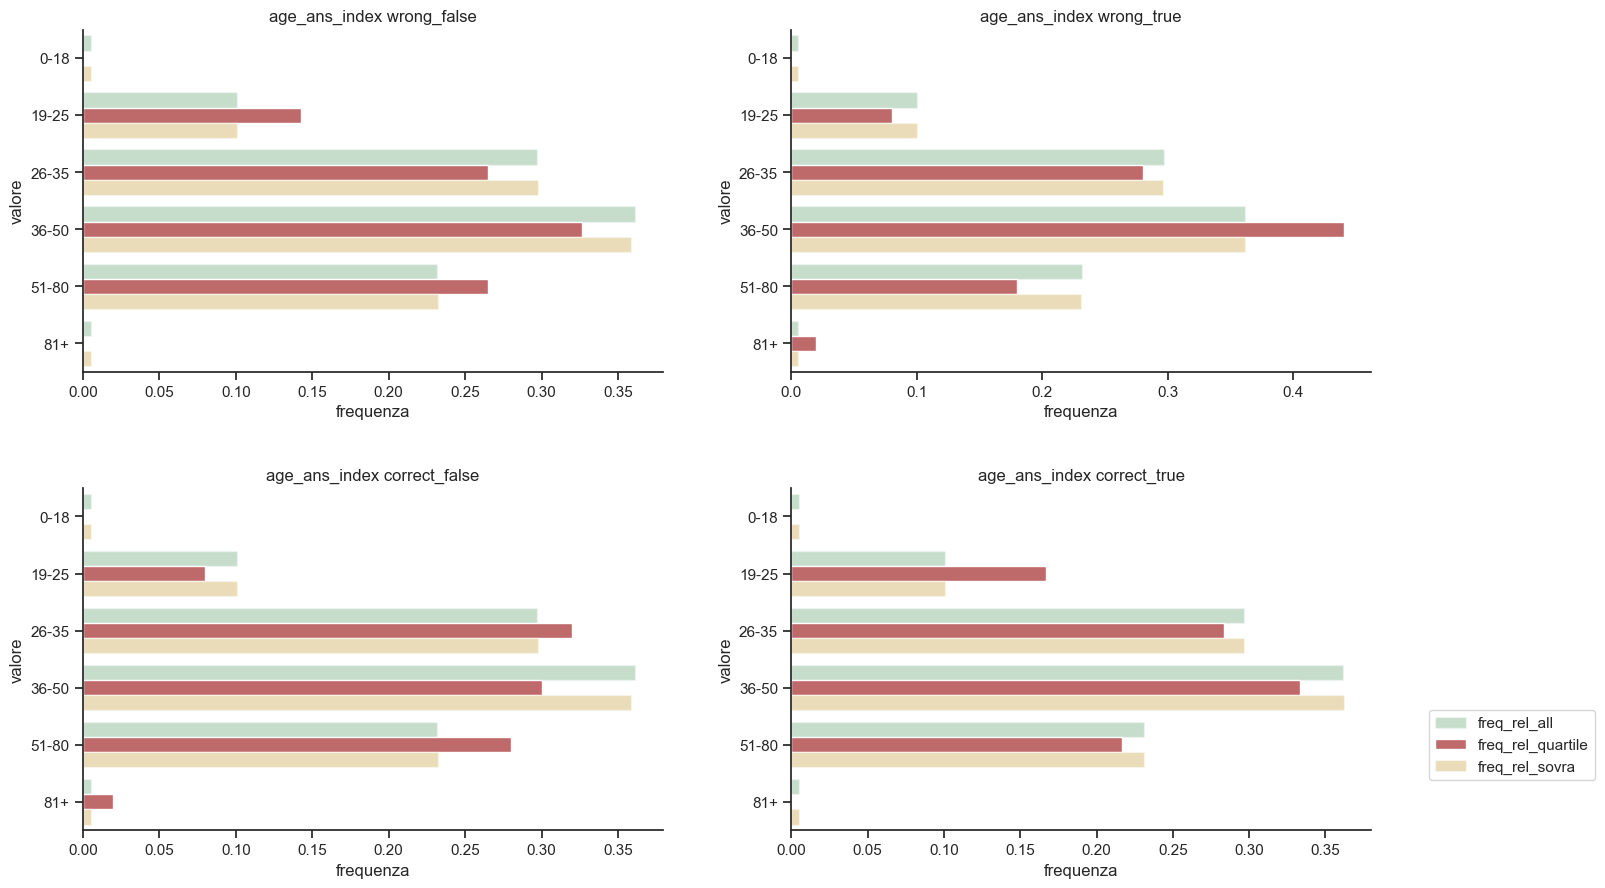

In [60]:
crea_barplot(raccoglitore_dimensioni, dimensione)

d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


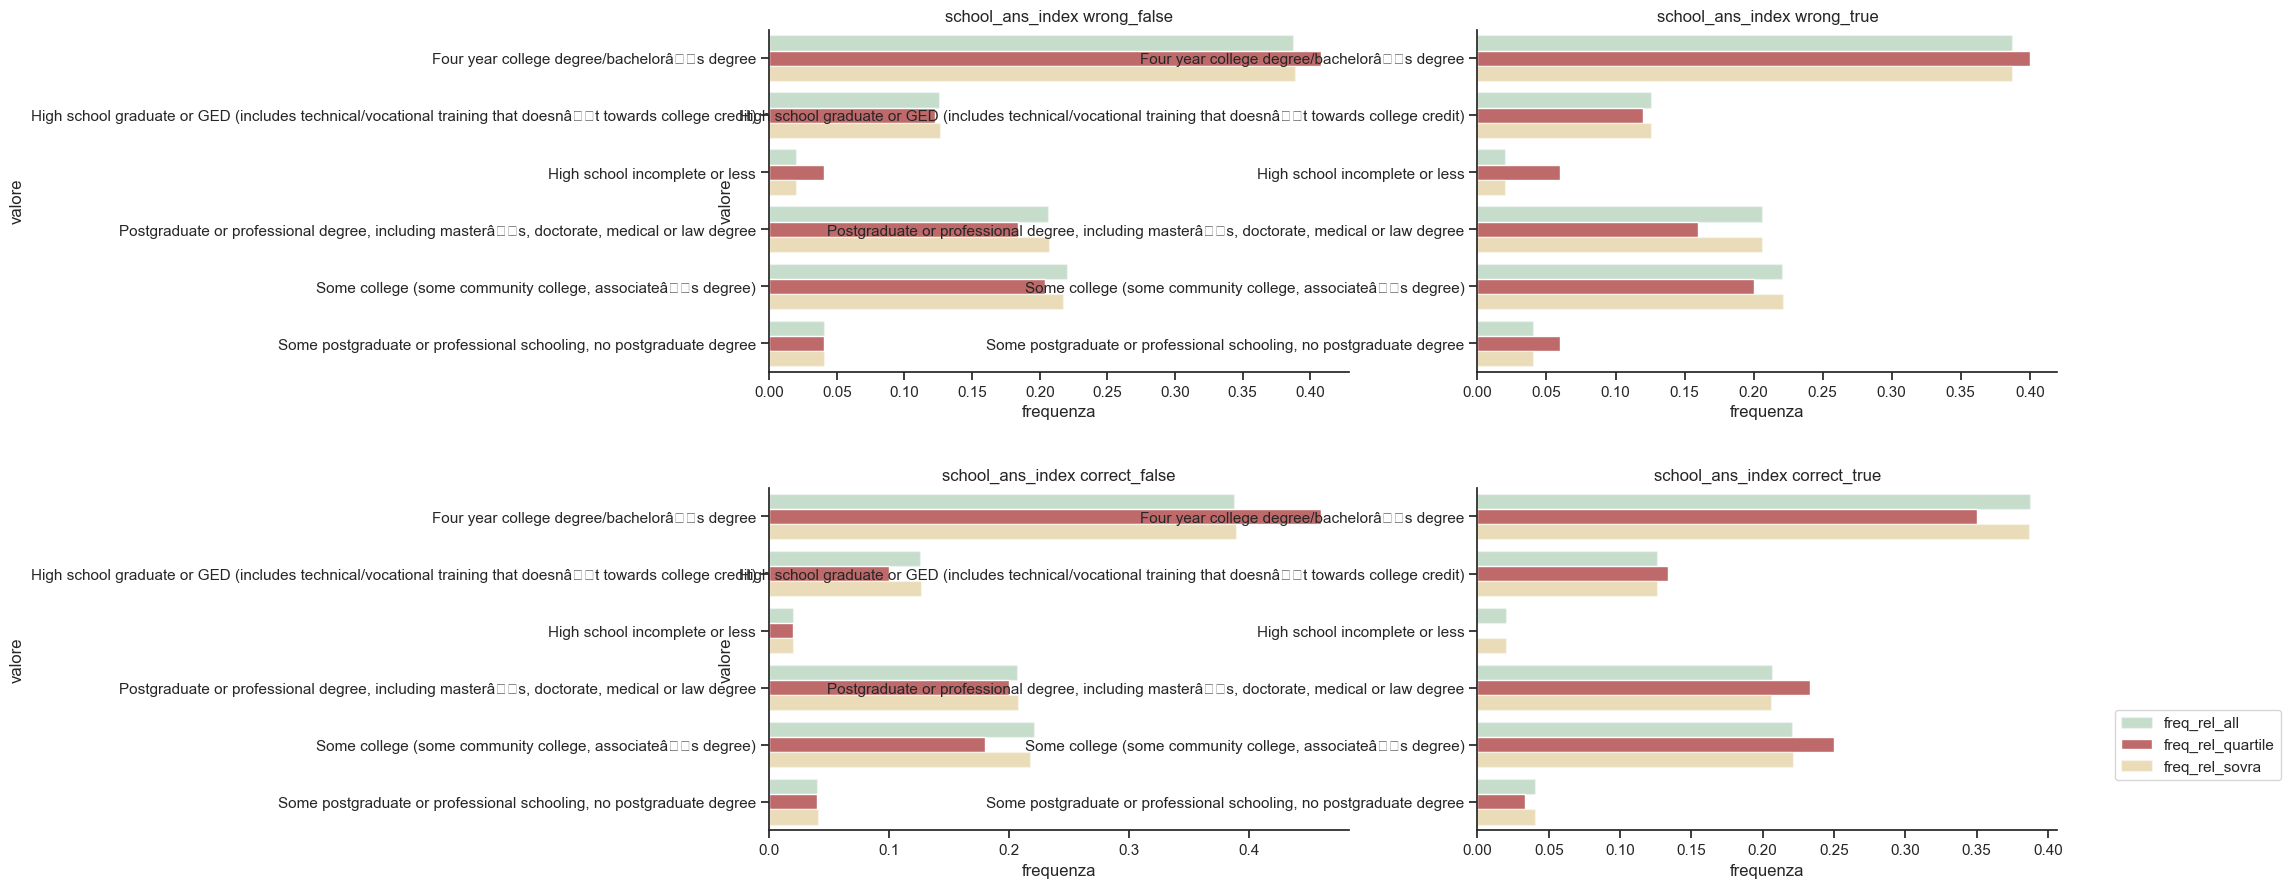

In [61]:
dimensione = "school_ans_index"
crea_barplot(raccoglitore_dimensioni, dimensione)

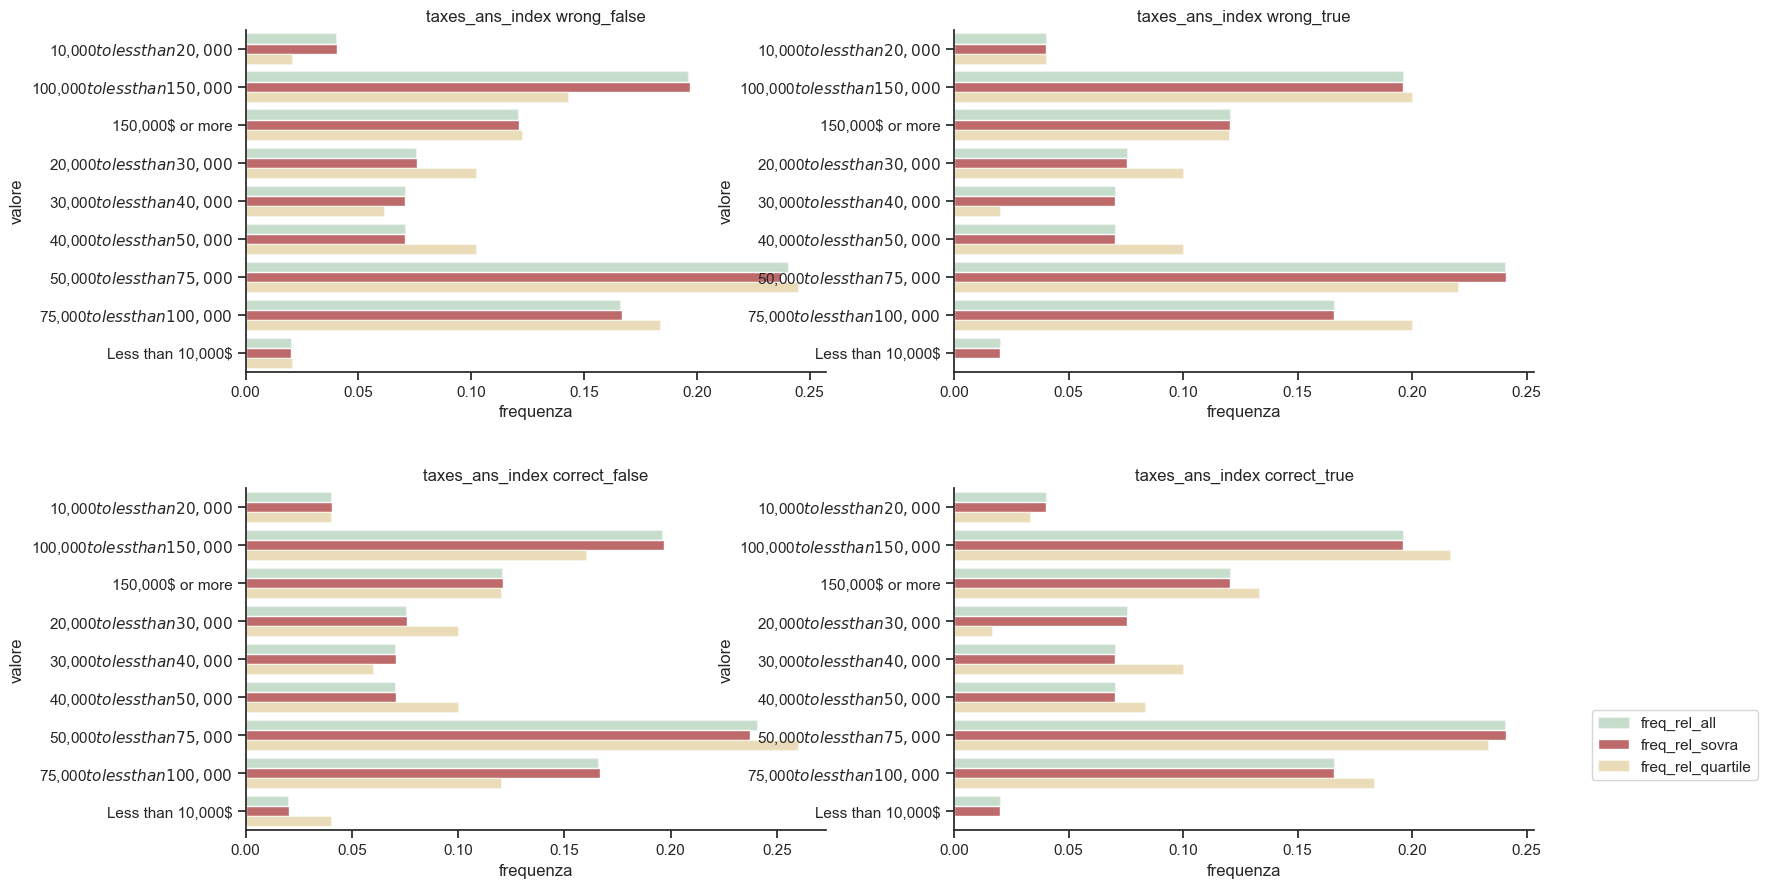

In [62]:
dimensione = "taxes_ans_index"
crea_barplot(raccoglitore_dimensioni, dimensione)

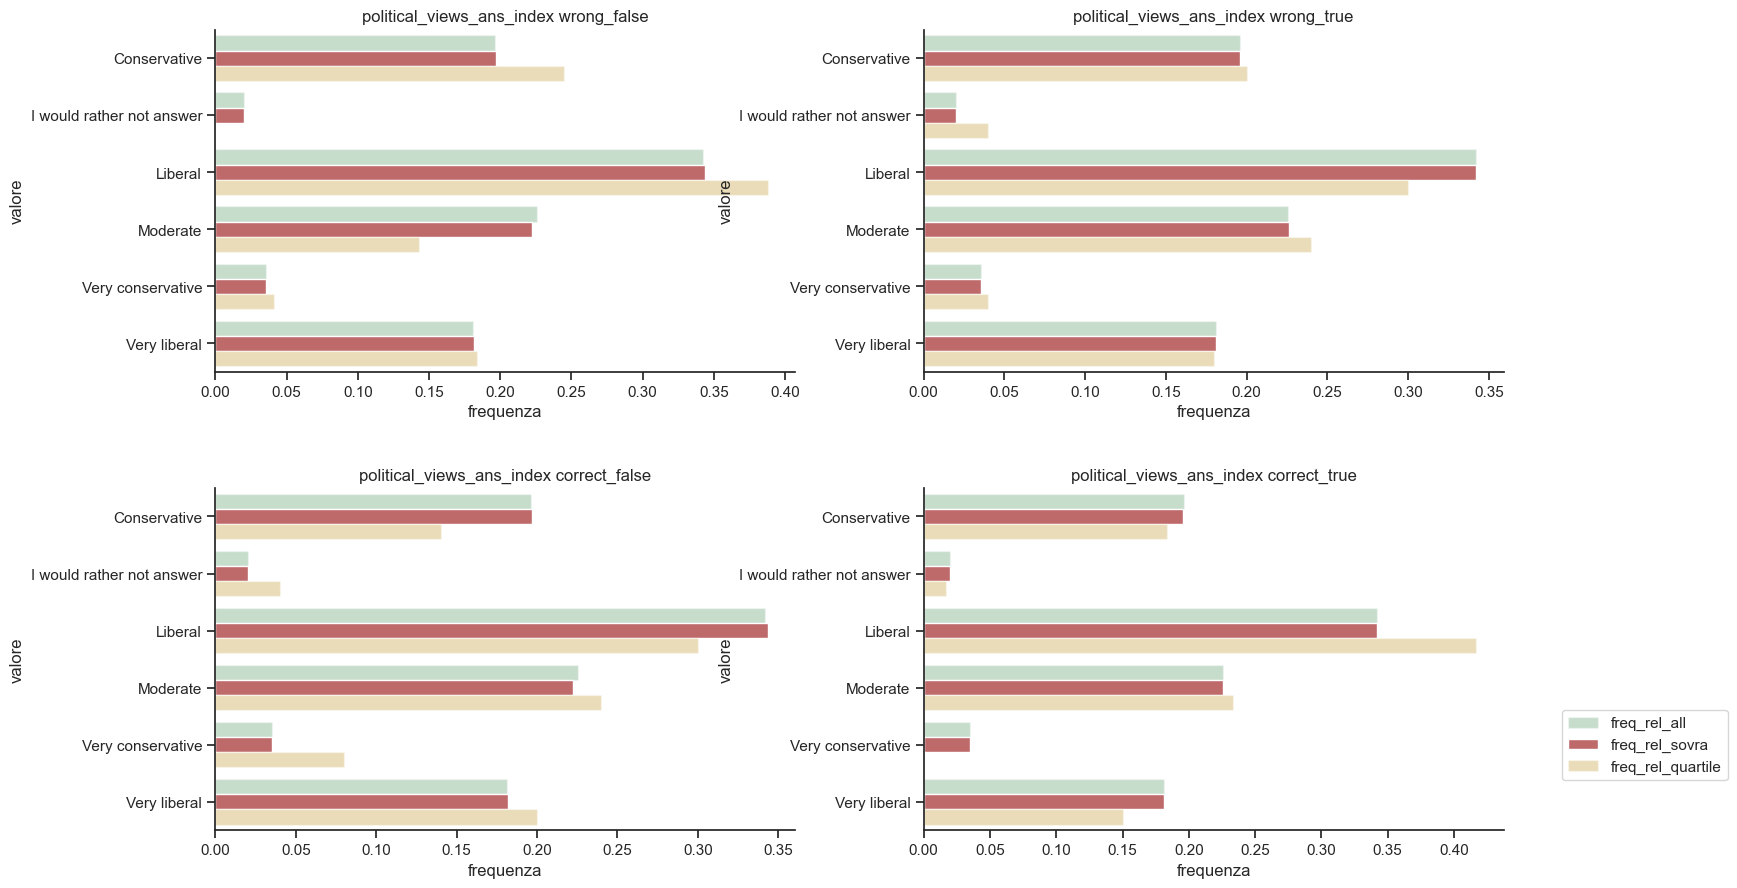

In [63]:
dimensione = "political_views_ans_index"
crea_barplot(raccoglitore_dimensioni, dimensione)

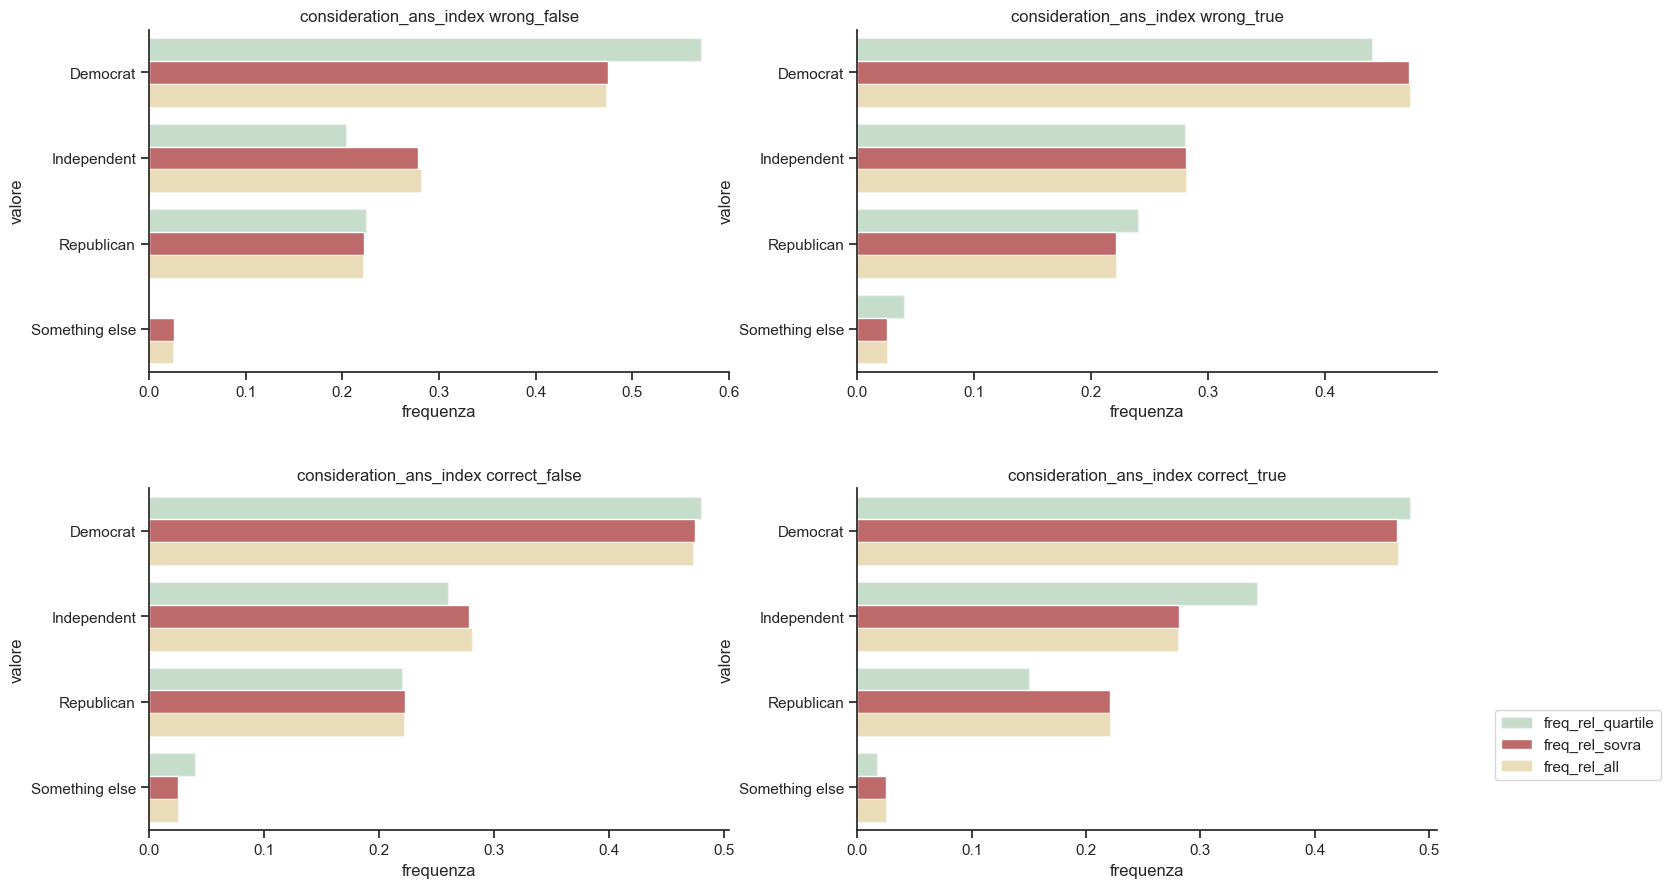

In [64]:
dimensione = "consideration_ans_index"
crea_barplot(raccoglitore_dimensioni, dimensione)

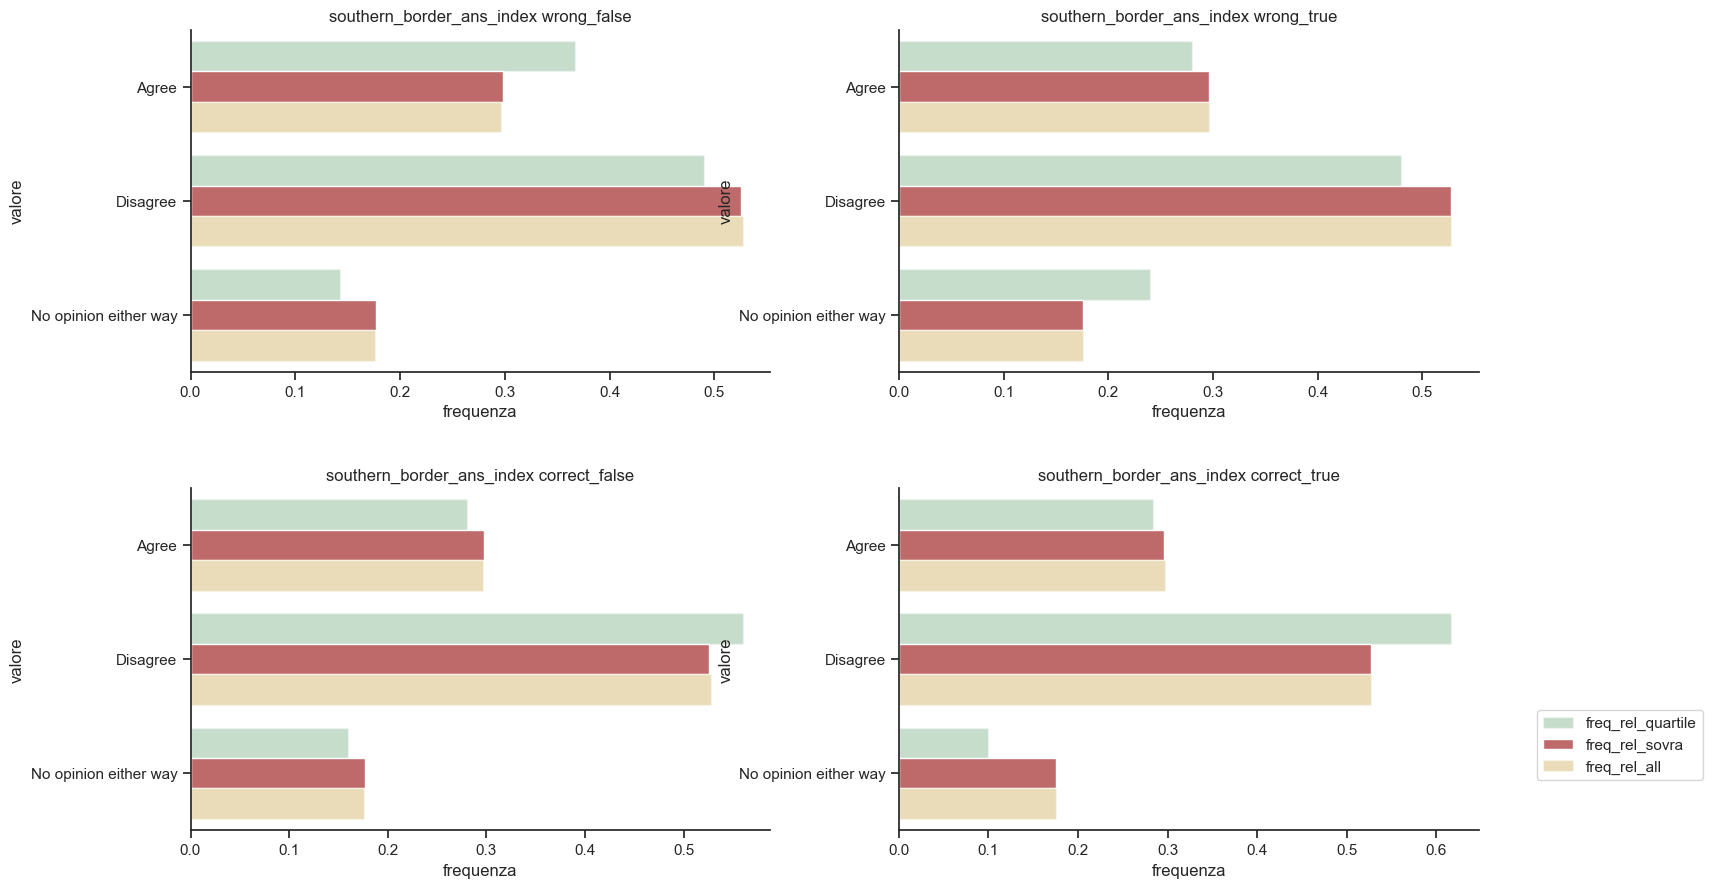

In [65]:
dimensione = "southern_border_ans_index"
crea_barplot(raccoglitore_dimensioni, dimensione)

-> secondo gruppo di domande

In [66]:
dimensioni_da_analizzare = ["s_info_1_ans_index","s_info_3_v2_ans_index","s_info_4_ans_index","s_info_5_ans_index","s_info_6_ans_index",
                            "s_info_7_ans_index","s_com_1_v2_ans_index","s_com_2_ans_index"]

quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

In [67]:
# definisco un dizionario che conterrà i df delle dimensioni
raccoglitore_dimensioni = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_dimensioni[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # set sovra
        if quartile == "wrong_false" or quartile == "correct_false":
            sovra = "pants-on-fire"
        else:
            sovra = "true"
        
        # creo il df
        raccoglitore_dimensioni[dimensione][quartile]=crea_subDF_con_frequenze(df_for_Q1, sovra, quartile, dimensione,mapping)

In [68]:
# esempio
raccoglitore_dimensioni["s_info_1_ans_index"]["wrong_false"]

valore                    label  freq_ass_all  freq_ass_sovra  \
5    0.0        completely_untrue             6               1   
4    1.0          slightly_untrue            18               3   
3    2.0  not_true_and_not_untrue            12               2   
0    3.0            slightly_true           312              52   
1    4.0          completely_true           815             135   
2    5.0          dont_understand            24               4   
6    6.0               not_answer             6               1   

   freq_ass_quartile  freq_rel_all  freq_rel_sovra  freq_rel_quartile  
5                  0      0.005029        0.005051           0.000000  
4                  0      0.015088        0.015152           0.000000  
3                  1      0.010059        0.010101           0.020408  
0                 13      0.261526        0.262626           0.265306  
1                 33      0.683152        0.681818           0.673469  
2                  1      0.020117        0.020202           0.020408  
6                  1      0.005029        0.005051           0.020408

In [69]:
# definisco un dizionario che conterrà i df dei p-value
raccoglitore_pvalue = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_pvalue[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # estraggo le frequenze assolute dal dizionario raccoglitore_dimensioni
        
        freq_ass_quartile = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_quartile"]
        freq_ass_all = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_all"]
        freq_ass_sovra = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_sovra"]
        
        # calcolo i p-value
        
        p_value_quartile_all = prop_test(freq_ass_quartile,freq_ass_all)
        p_value_sovra_all = prop_test(freq_ass_sovra,freq_ass_all)
        
        # per calculare il p-value del quartile rispetto alla sovra categoria devo eliminare i valori 0 => poichè ci possono essere valori che non ci sono ne nel quartile ne nella sovra categoria
        
        for i in range(0,len(freq_ass_sovra)):
            if freq_ass_sovra[i] == 0 or freq_ass_sovra[i] == "0":
                freq_ass_sovra.pop(i)
                freq_ass_quartile.pop(i)
            
        p_value_quartile_sovra = prop_test(freq_ass_quartile,freq_ass_sovra)
        
        # creo row
        
        row = [[p_value_quartile_all,
              p_value_quartile_sovra,
              p_value_sovra_all
        ]]
        
        # creo il df
        
        raccoglitore_pvalue[dimensione][quartile] = pd.DataFrame(row, columns=["pvalue_quartile_all", "pvalue_quartile_sovra", "pvalue_sovra_all"])

In [70]:
significativi = []

valore_significativo = 0.05

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        for val in raccoglitore_pvalue[dimensione][quartile]:
            if raccoglitore_pvalue[dimensione][quartile][val][0] < valore_significativo:
                row = [dimensione, quartile, val, raccoglitore_pvalue[dimensione][quartile][val][0]]
                significativi.append(row)
significativi = pd.DataFrame(significativi, columns=["dimensione", "quartile", "confronto", "valore_pvalue"])
significativi.sort_values(by=["valore_pvalue"], ascending=True)

dimensione       quartile              confronto  valore_pvalue
2  s_com_1_v2_ans_index    wrong_false  pvalue_quartile_sovra       0.015227
1    s_info_4_ans_index  correct_false  pvalue_quartile_sovra       0.016965
0    s_info_4_ans_index  correct_false    pvalue_quartile_all       0.049524

In [71]:
# definisco un ordine per la visualizzazione dei quartili
ordine = ["wrong_false", "other_false","correct_false","other","wrong_true", "other_true","correct_true"]

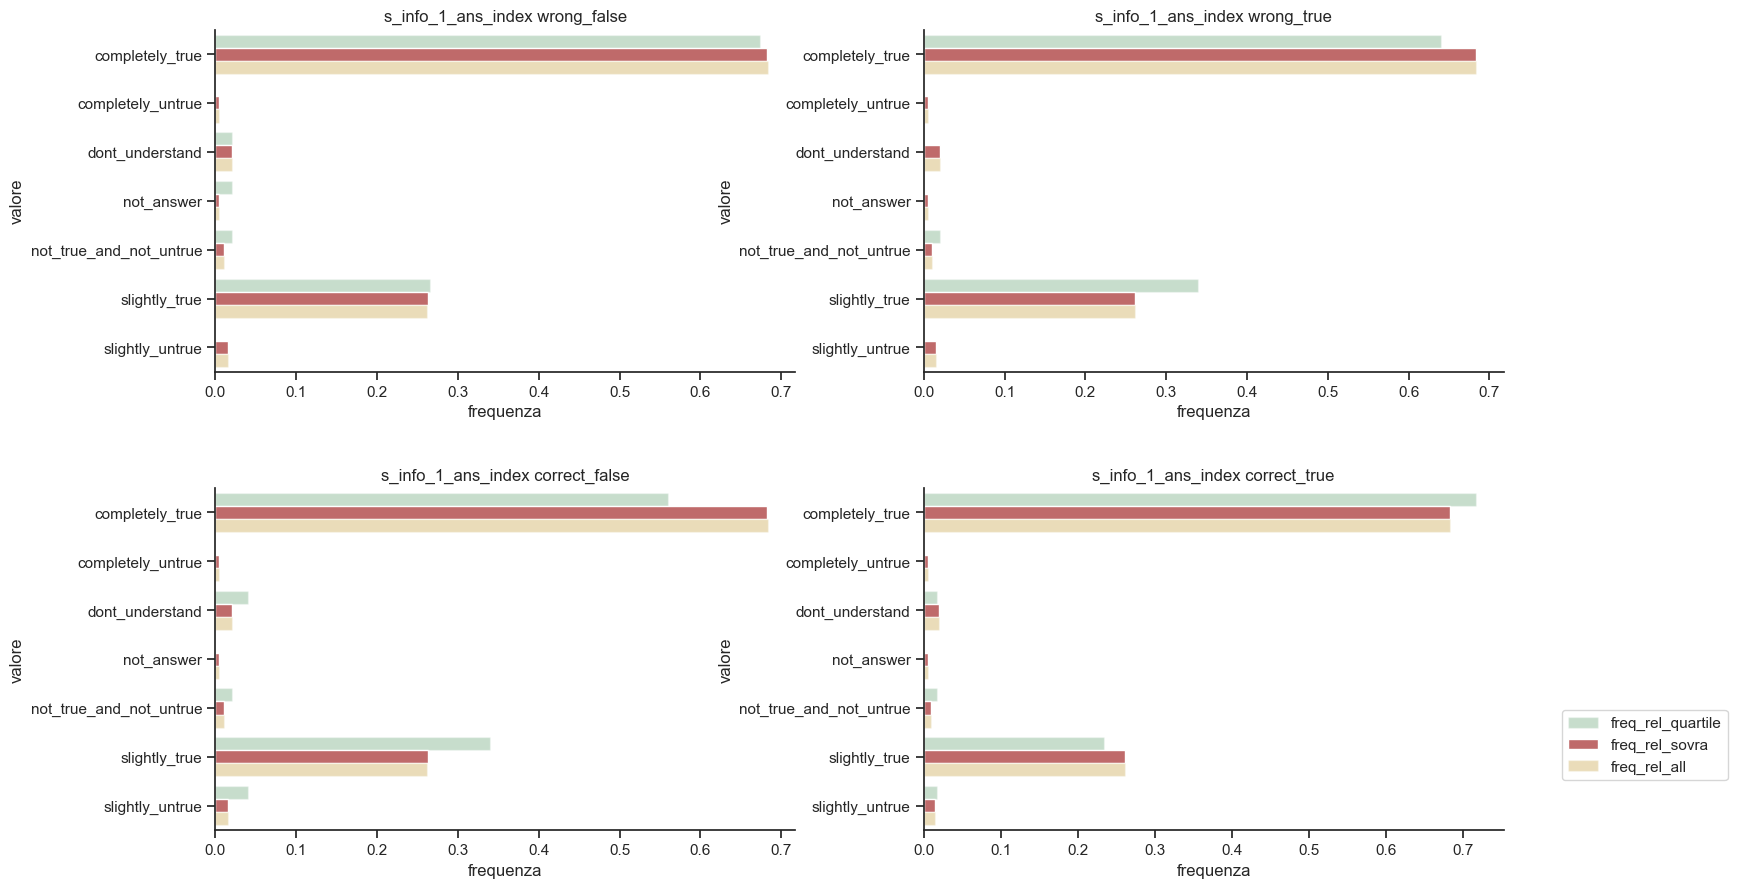

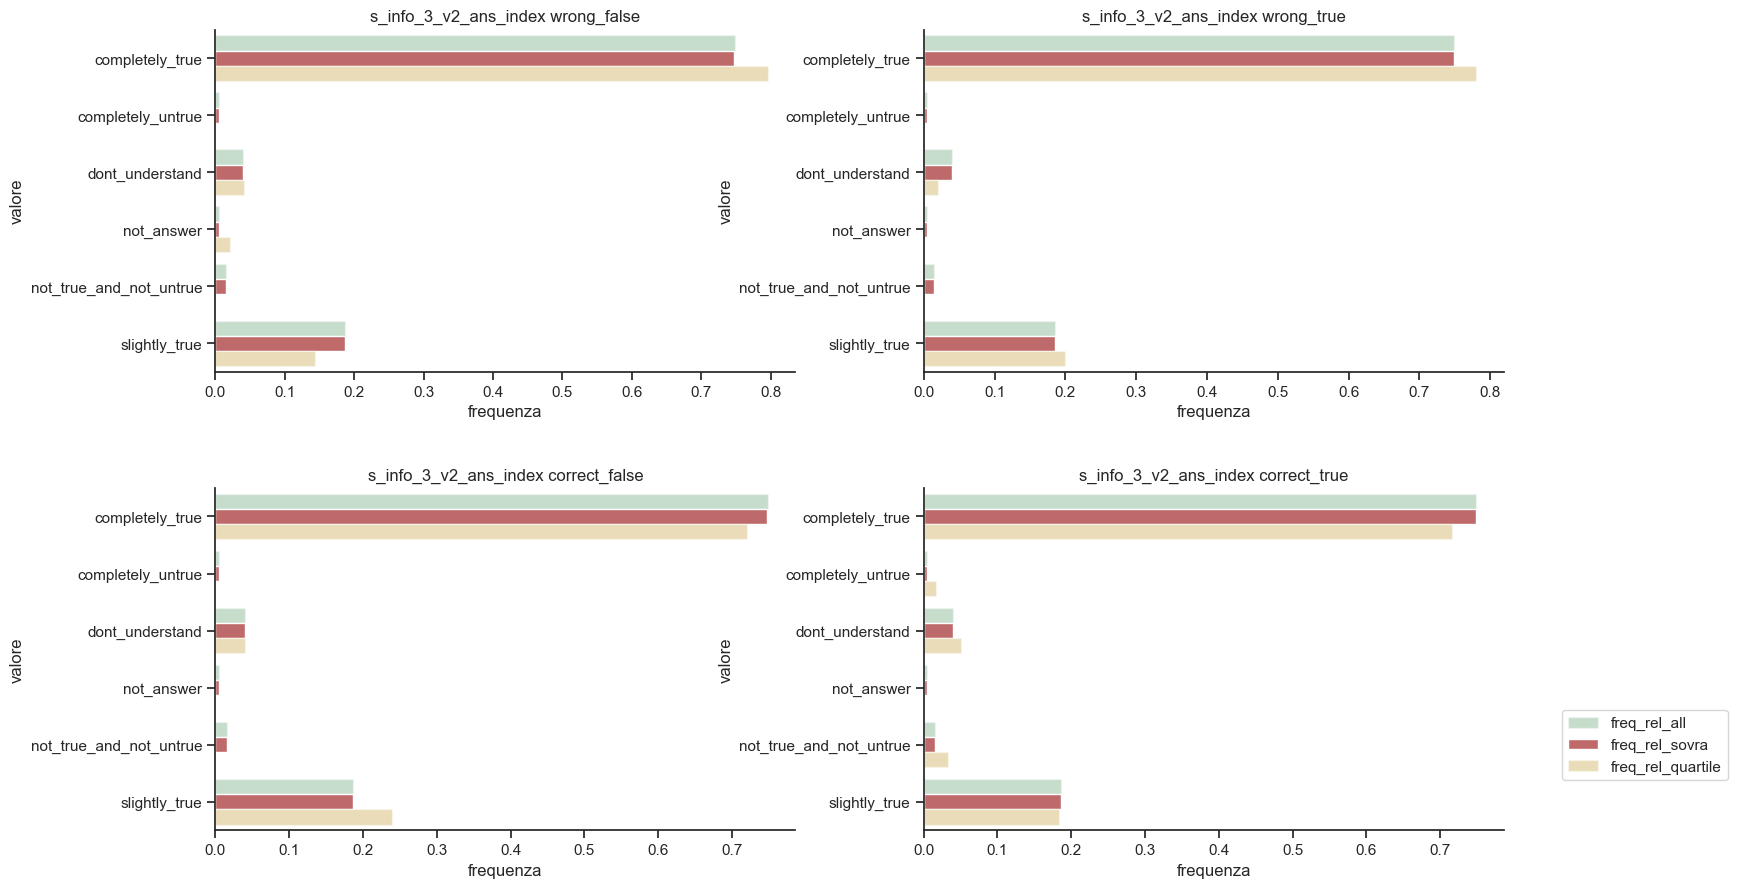

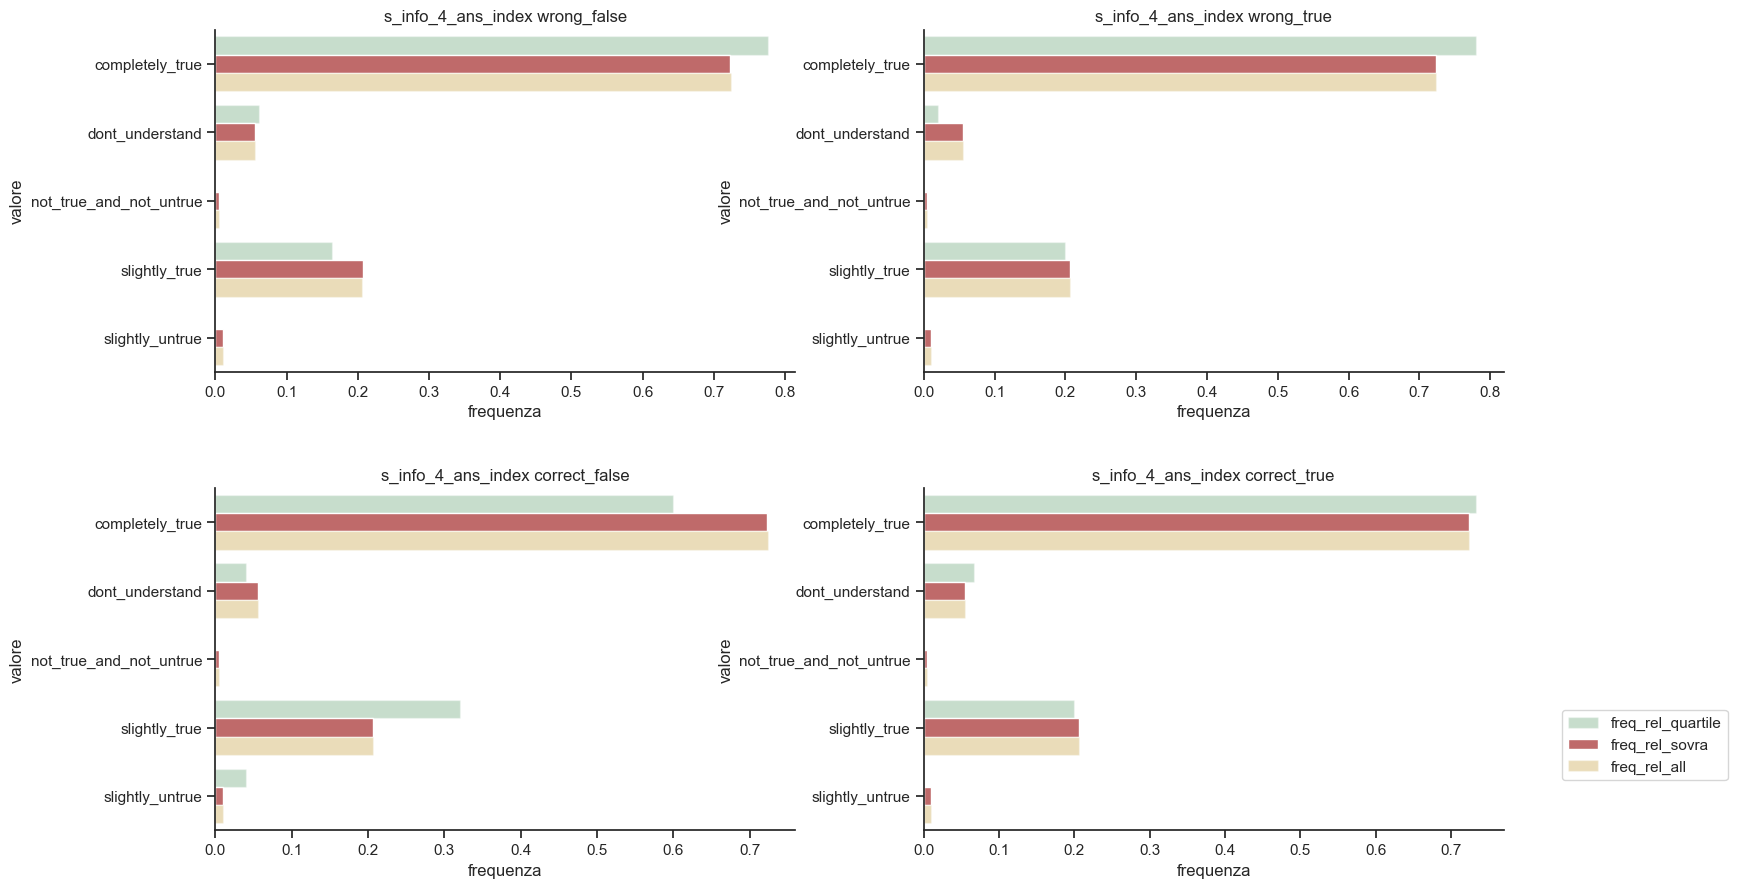

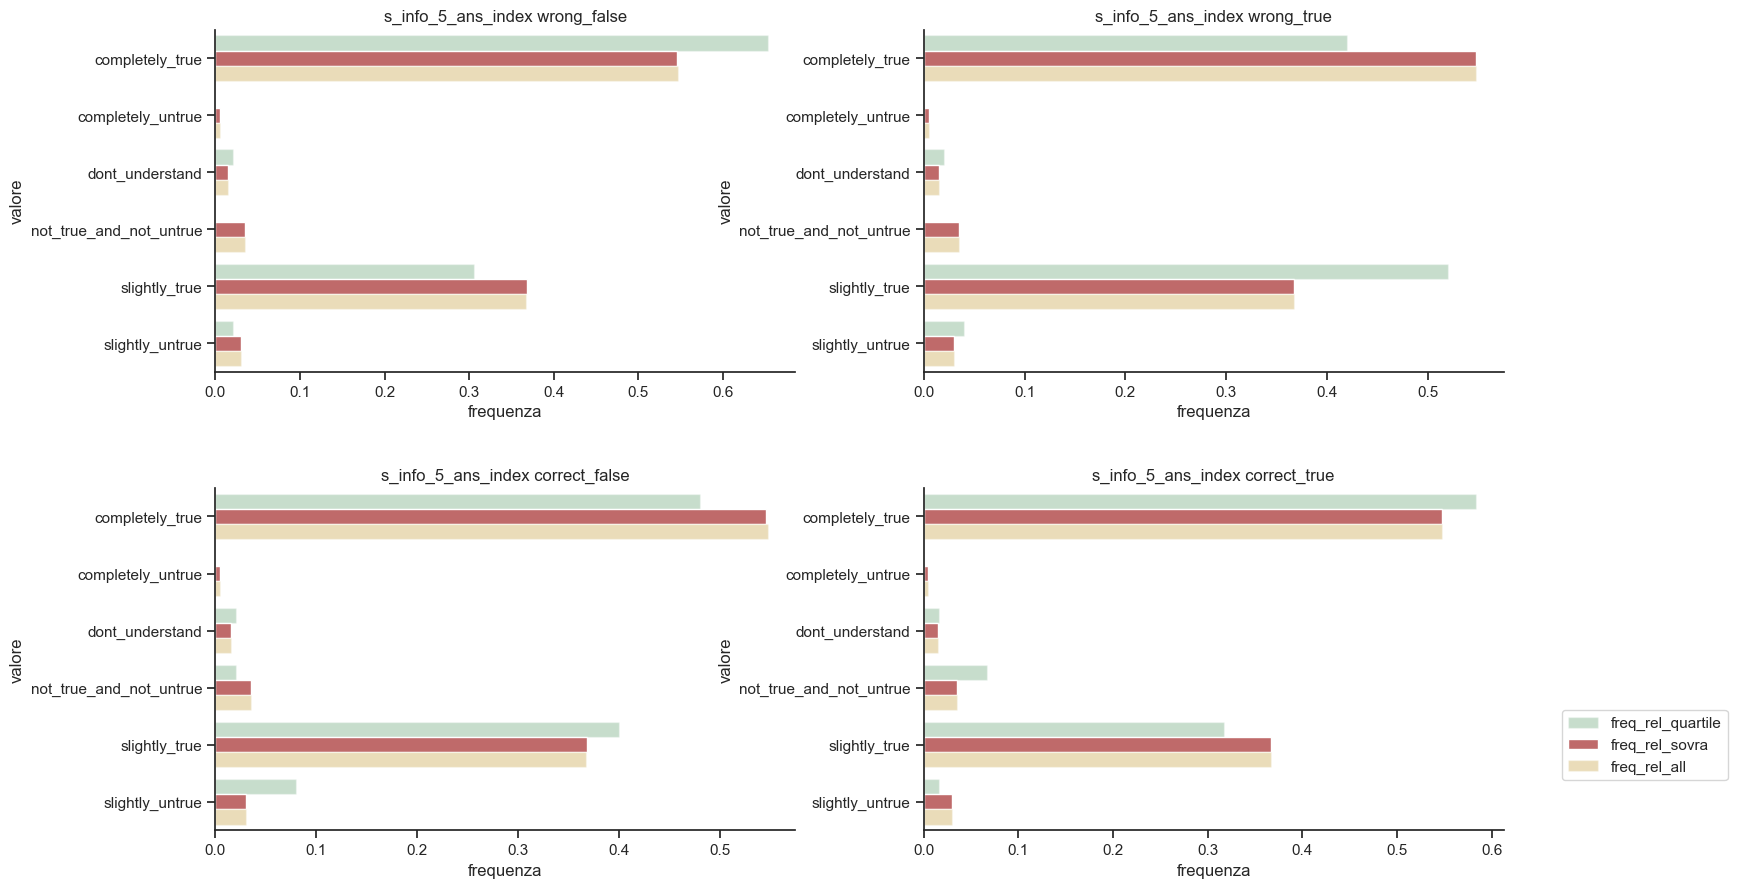

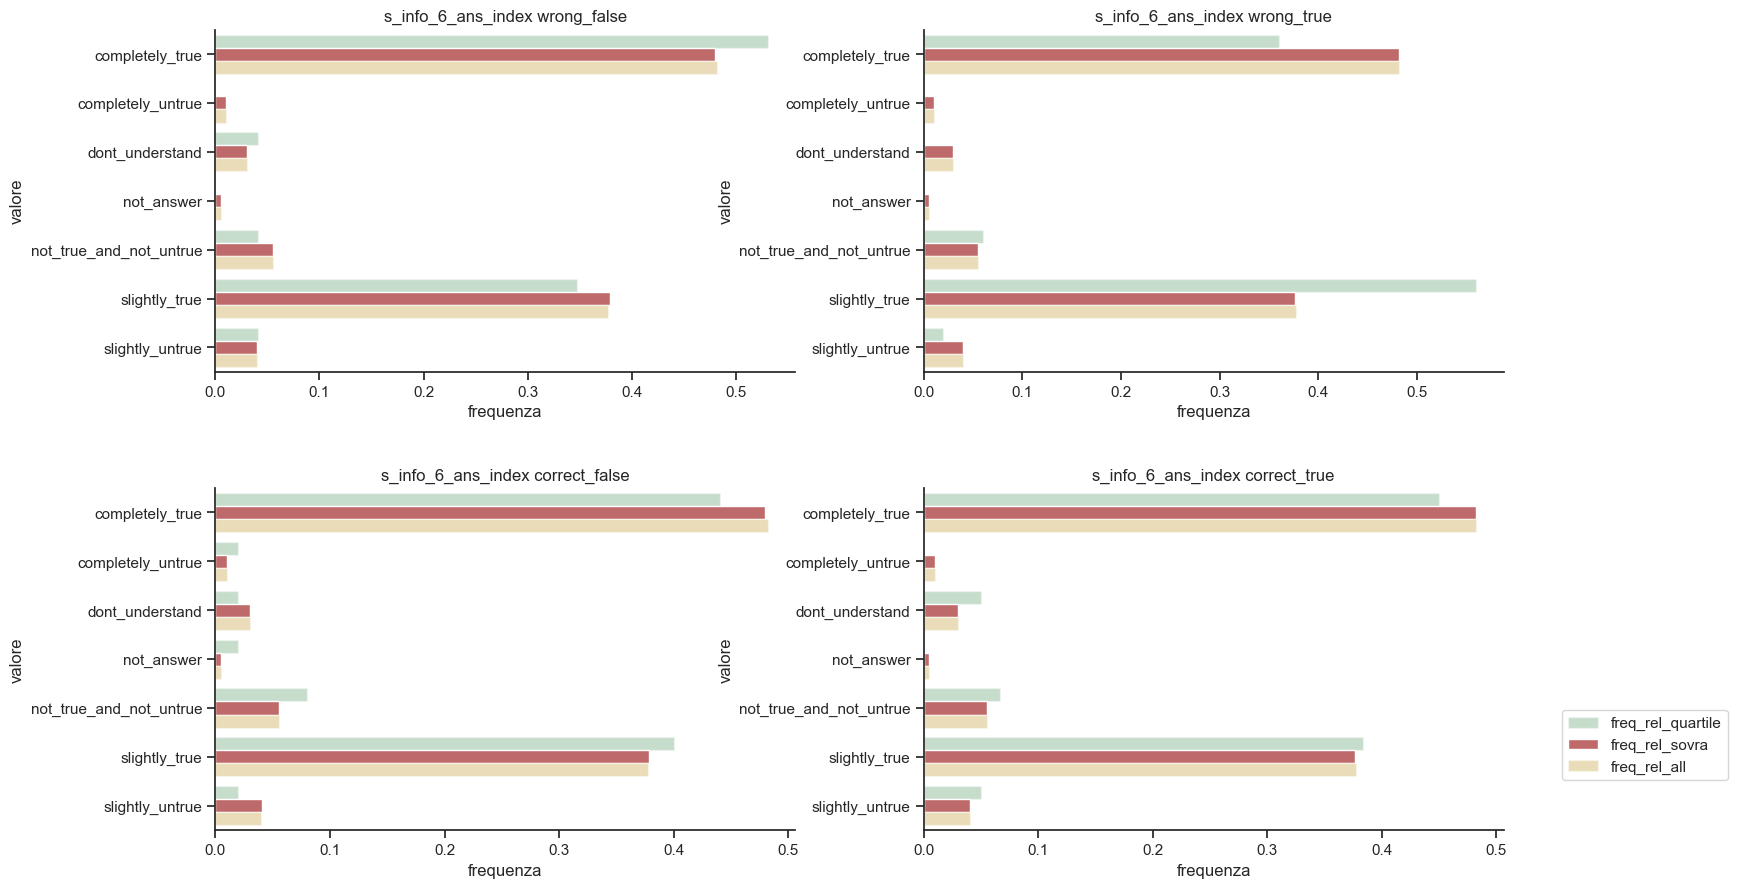

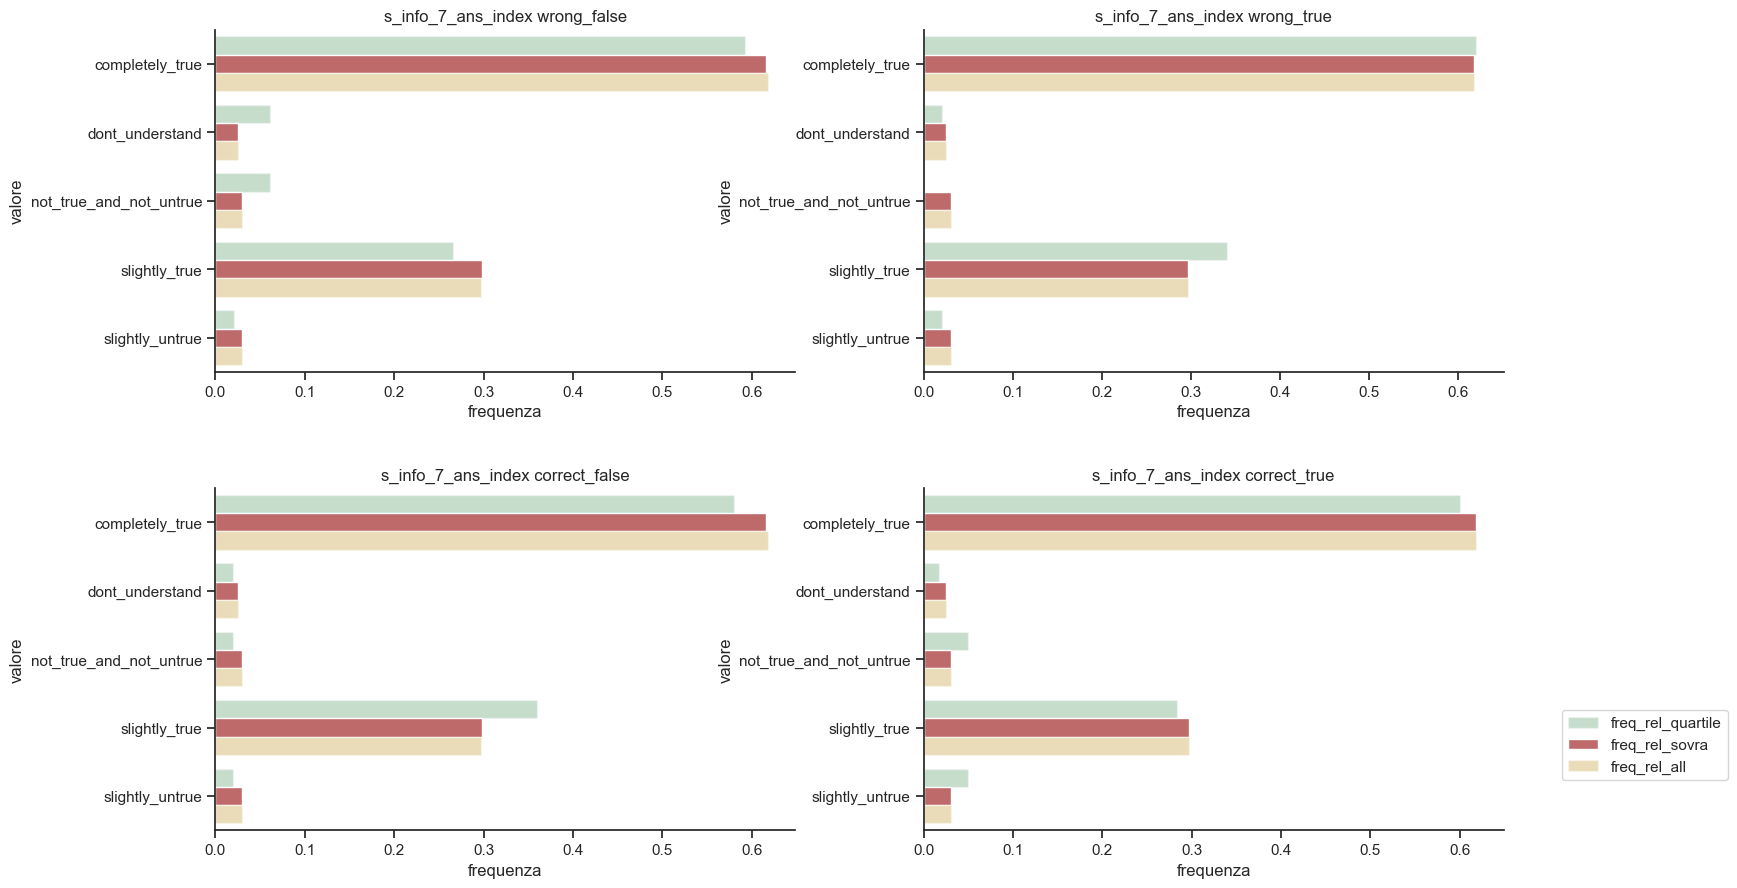

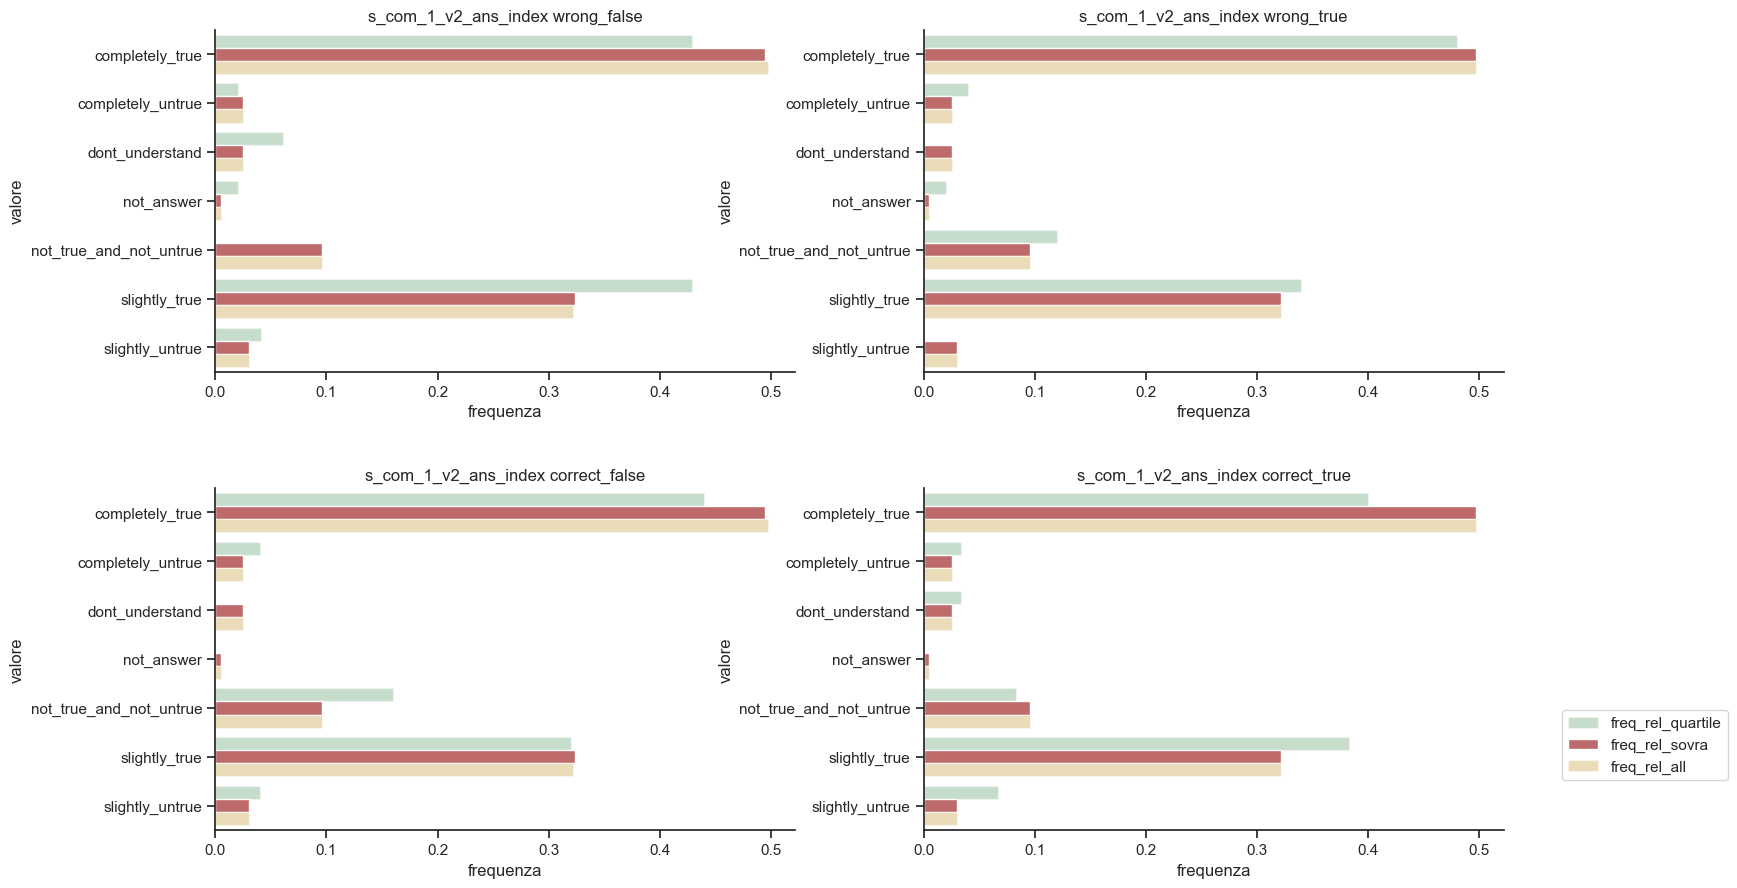

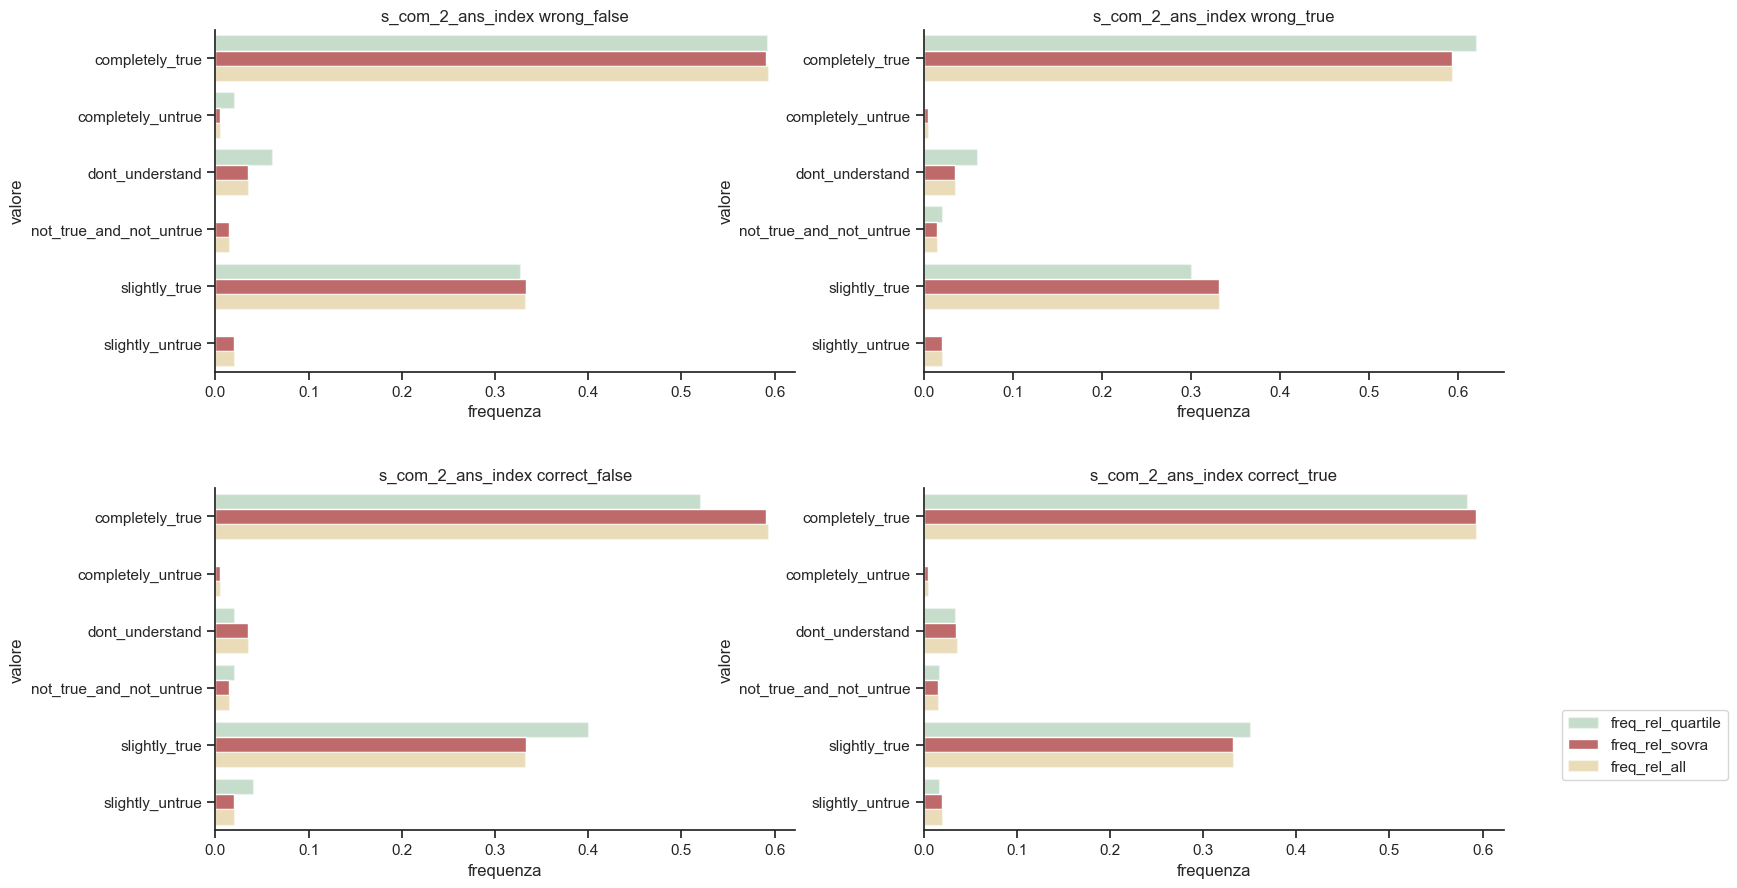

In [72]:
for dimensione in dimensioni_da_analizzare:
    crea_barplot(raccoglitore_dimensioni, dimensione)

-> terzo gruppo

In [73]:
dimensioni_da_analizzare = ["k_info_1_ans_index","k_info_2_ans_index","k_info_3_ans_index","k_crea_2_ans_index","k_ai_2_ans_index",
                            "k_ai_4_ans_index"]

quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

In [74]:
# definisco un dizionario che conterrà i df delle dimensioni
raccoglitore_dimensioni = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_dimensioni[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # set sovra
        if quartile == "wrong_false" or quartile == "correct_false":
            sovra = "pants-on-fire"
        else:
            sovra = "true"
        
        # creo il df
        raccoglitore_dimensioni[dimensione][quartile]=crea_subDF_con_frequenze(df_for_Q1, sovra, quartile, dimensione,mapping)

In [75]:
# definisco un dizionario che conterrà i df dei p-value
raccoglitore_pvalue = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_pvalue[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # estraggo le frequenze assolute dal dizionario raccoglitore_dimensioni
        
        freq_ass_quartile = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_quartile"]
        freq_ass_all = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_all"]
        freq_ass_sovra = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_sovra"]
        
        # calcolo i p-value
        
        p_value_quartile_all = prop_test(freq_ass_quartile,freq_ass_all)
        p_value_sovra_all = prop_test(freq_ass_sovra,freq_ass_all)
        
        # per calculare il p-value del quartile rispetto alla sovra categoria devo eliminare i valori 0 => poichè ci possono essere valori che non ci sono ne nel quartile ne nella sovra categoria
        
        for i in range(0,len(freq_ass_sovra)):
            if freq_ass_sovra[i] == 0 or freq_ass_sovra[i] == "0":
                freq_ass_sovra.pop(i)
                freq_ass_quartile.pop(i)
            
        p_value_quartile_sovra = prop_test(freq_ass_quartile,freq_ass_sovra)
        
        # creo row
        
        row = [[p_value_quartile_all,
              p_value_quartile_sovra,
              p_value_sovra_all
        ]]
        
        # creo il df
        
        raccoglitore_pvalue[dimensione][quartile] = pd.DataFrame(row, columns=["pvalue_quartile_all", "pvalue_quartile_sovra", "pvalue_sovra_all"])

In [76]:
significativi = []

valore_significativo = 0.05

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        for val in raccoglitore_pvalue[dimensione][quartile]:
            if raccoglitore_pvalue[dimensione][quartile][val][0] < valore_significativo:
                row = [dimensione, quartile, val, raccoglitore_pvalue[dimensione][quartile][val][0]]
                significativi.append(row)
significativi = pd.DataFrame(significativi, columns=["dimensione", "quartile", "confronto", "valore_pvalue"])
significativi.sort_values(by=["valore_pvalue"], ascending=True)

dimensione      quartile              confronto  valore_pvalue
3    k_ai_4_ans_index   wrong_false  pvalue_quartile_sovra       0.018400
0  k_info_1_ans_index   wrong_false  pvalue_quartile_sovra       0.027682
1  k_info_1_ans_index  correct_true  pvalue_quartile_sovra       0.030529
2    k_ai_4_ans_index   wrong_false    pvalue_quartile_all       0.047689

In [77]:
# definisco un ordine per la visualizzazione dei quartili
ordine = ["wrong_false", "other_false","correct_false","other","wrong_true", "other_true","correct_true"]

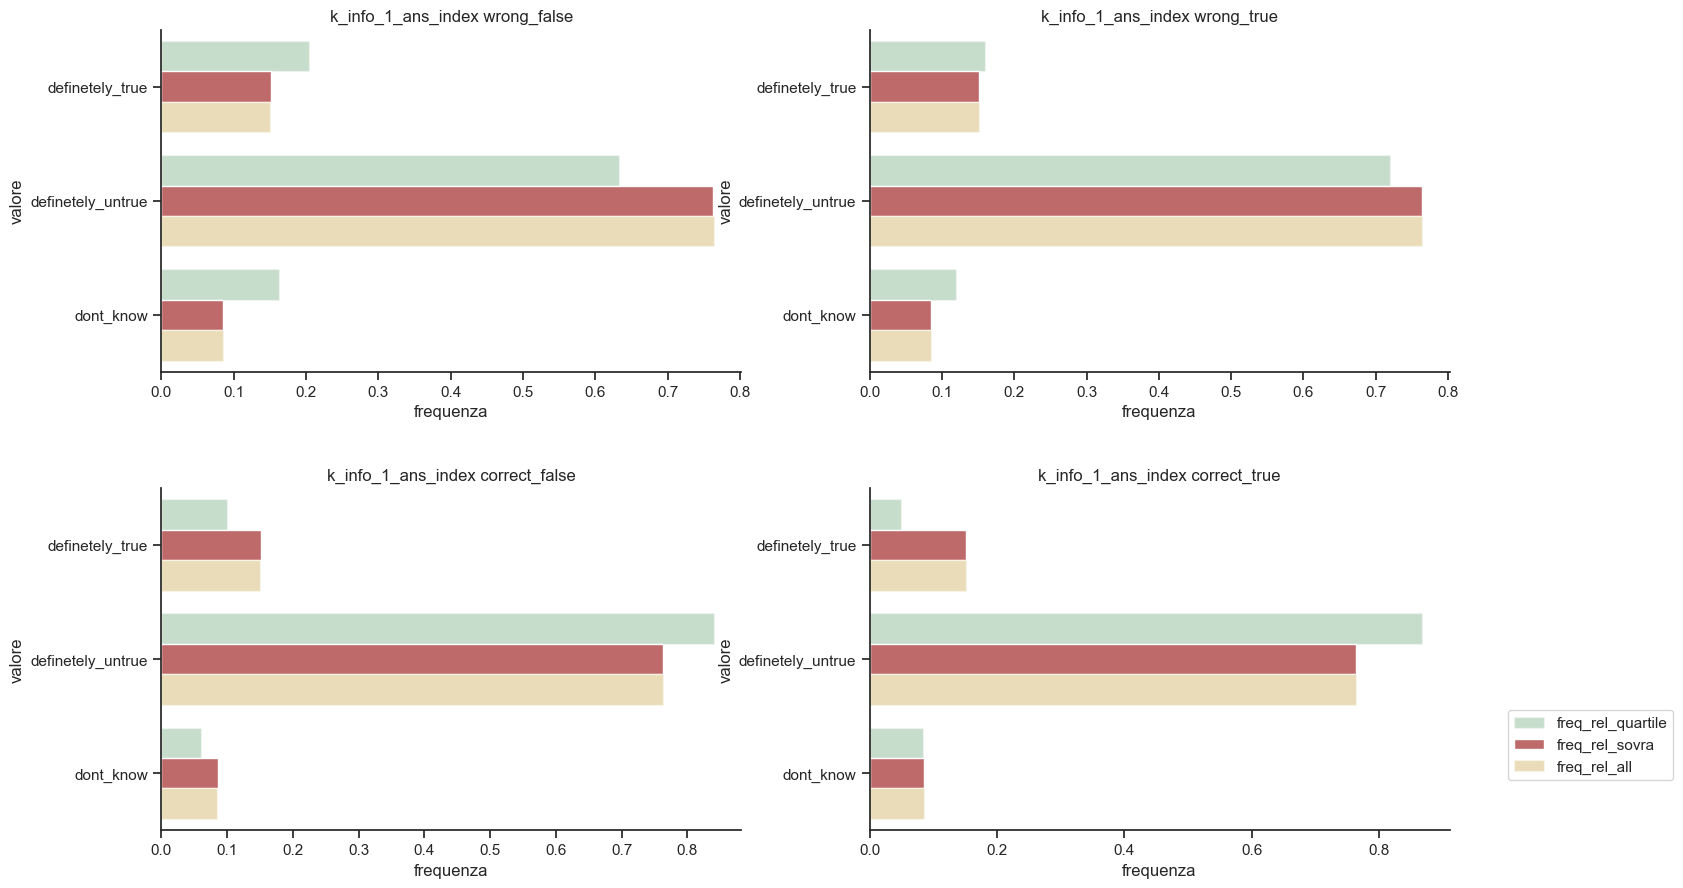

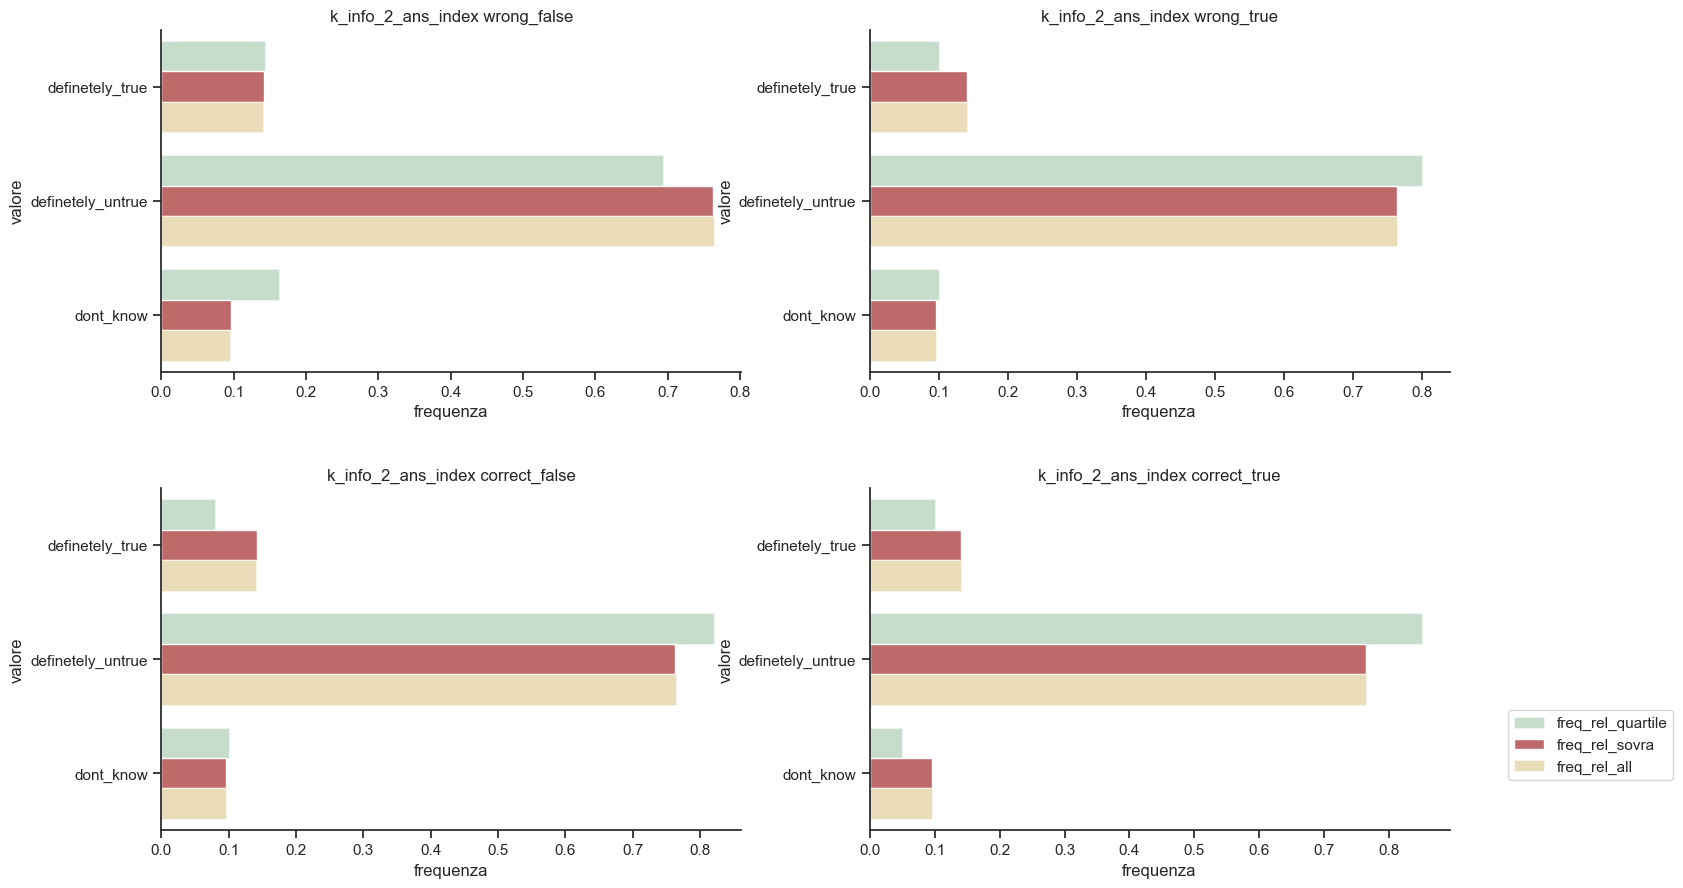

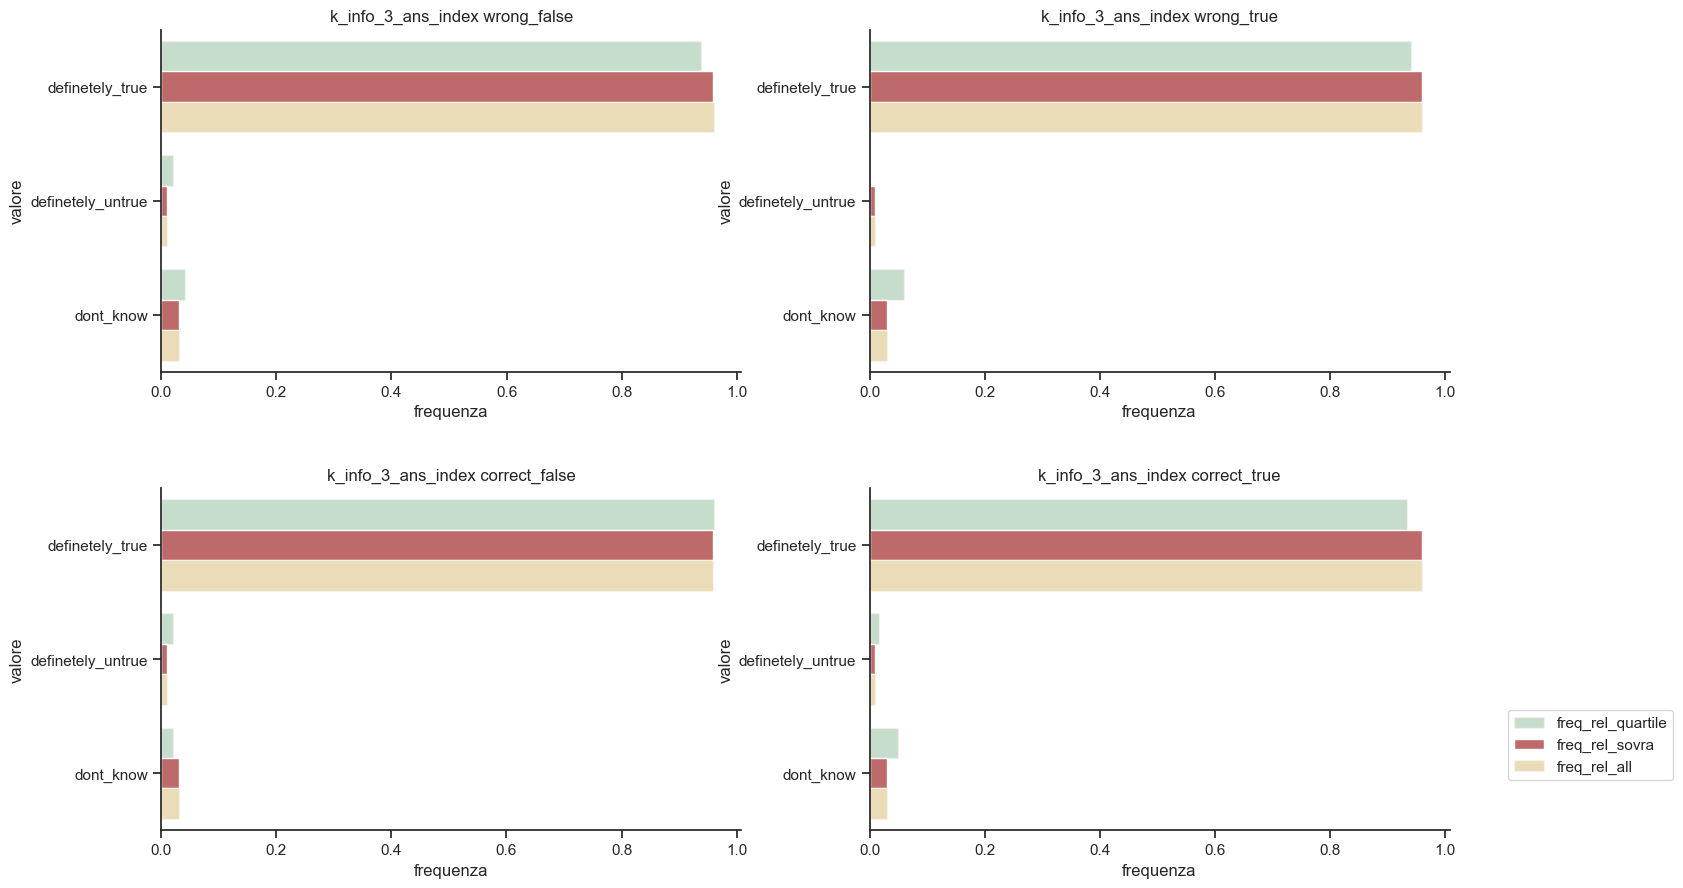

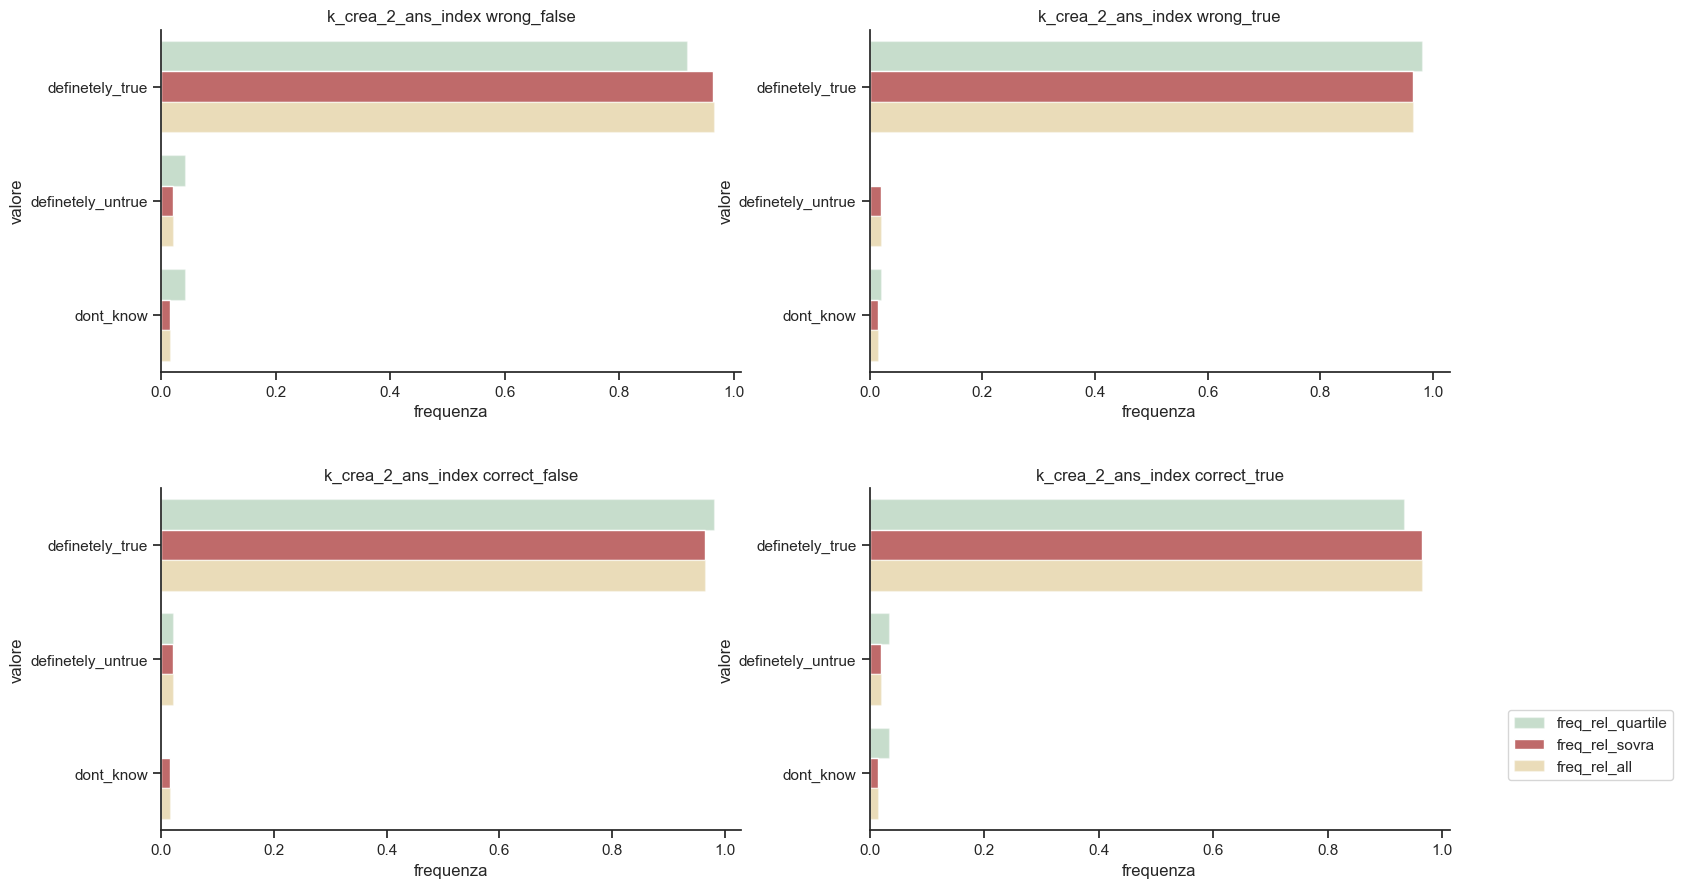

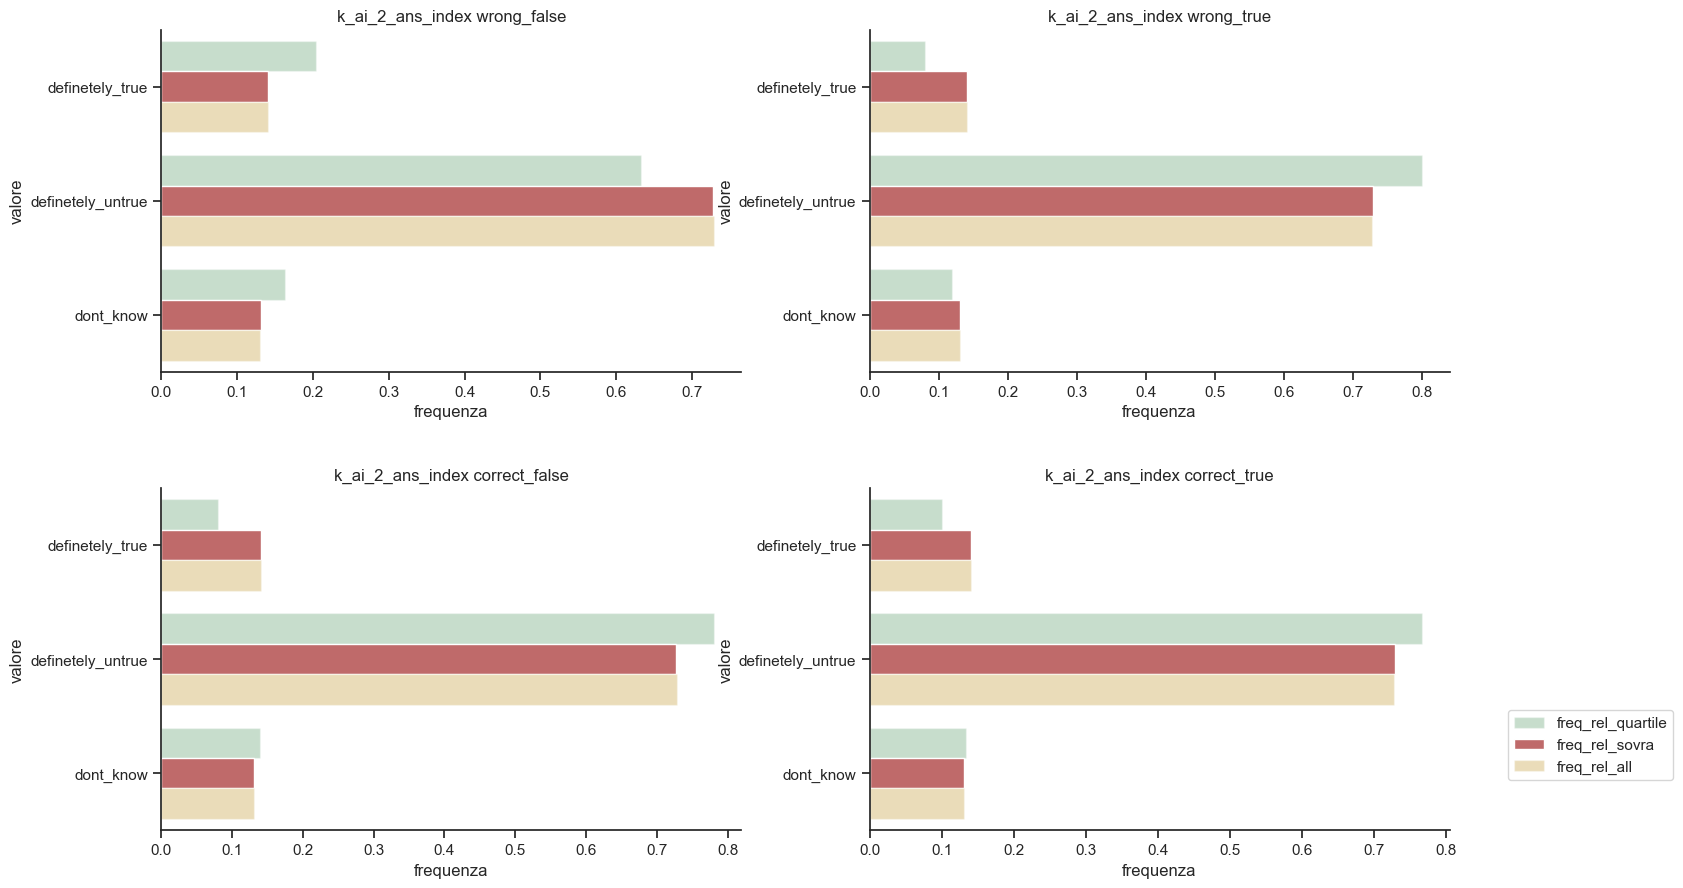

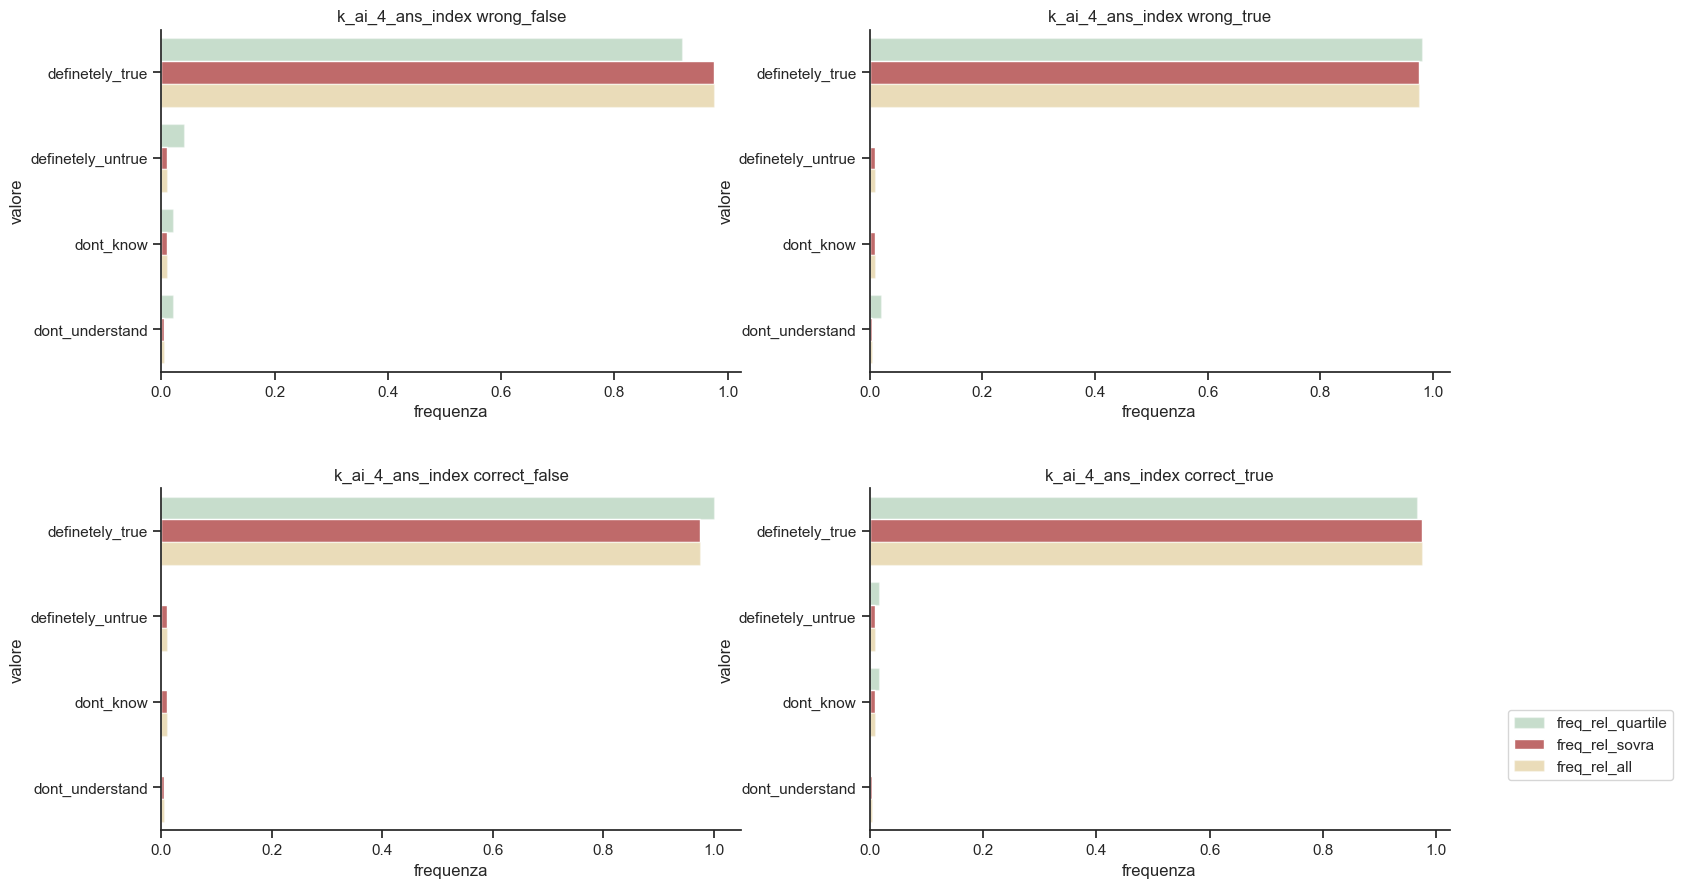

In [78]:
for dimensione in dimensioni_da_analizzare:
    crea_barplot(raccoglitore_dimensioni, dimensione)

## Regressione

In [79]:
dimensioni_da_analizzare_per_regressione_1 = ["age_ans_index", "school_ans_index", "taxes_ans_index", "political_views_ans_index", "consideration_ans_index", "southern_border_ans_index"]


In [80]:
dimensioni_da_analizzare_per_regressione_2 = ["s_info_1_ans_index","s_info_3_v2_ans_index","s_info_4_ans_index","s_info_5_ans_index","s_info_6_ans_index",
                                             "s_info_7_ans_index","s_com_1_v2_ans_index","s_com_2_ans_index"]

In [81]:
dimensioni_da_analizzare_per_regressione_3 = ["k_info_1_ans_index","k_info_2_ans_index","k_info_3_ans_index","k_crea_2_ans_index","k_ai_2_ans_index",
                                             "k_ai_4_ans_index"]

In [82]:
dim_regressione = [dimensioni_da_analizzare_per_regressione_1,dimensioni_da_analizzare_per_regressione_2,dimensioni_da_analizzare_per_regressione_3]

calcolo medie per ciascun doc_id

In [83]:
sub = df_for_Q1[df_for_Q1["sovra"] != "other"]

for dimensione in dimensioni_da_analizzare_per_regressione_1:
    sub[dimensione[:-10]+"_mean"] = 0

for statement in sub["doc_id"].unique():
    #sovra = sub[sub["doc_id"] == statement]["sovra"].unique()[0]  
    for dim in dimensioni_da_analizzare_per_regressione_1:
        mean = np.asarray(sub[sub["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_for_Q1.loc[df_for_Q1["doc_id"] == statement, dim[:-10]+"_mean"] = mean 

C:\Users\gabri\AppData\Local\Temp\ipykernel_18880\4212151575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[dimensione[:-10]+"_mean"] = 0
C:\Users\gabri\AppData\Local\Temp\ipykernel_18880\4212151575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[dimensione[:-10]+"_mean"] = 0
C:\Users\gabri\AppData\Local\Temp\ipykernel_18880\4212151575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

age_ans_index
school_ans_index
taxes_ans_index
political_views_ans_index
consideration_ans_index
southern_border_ans_index


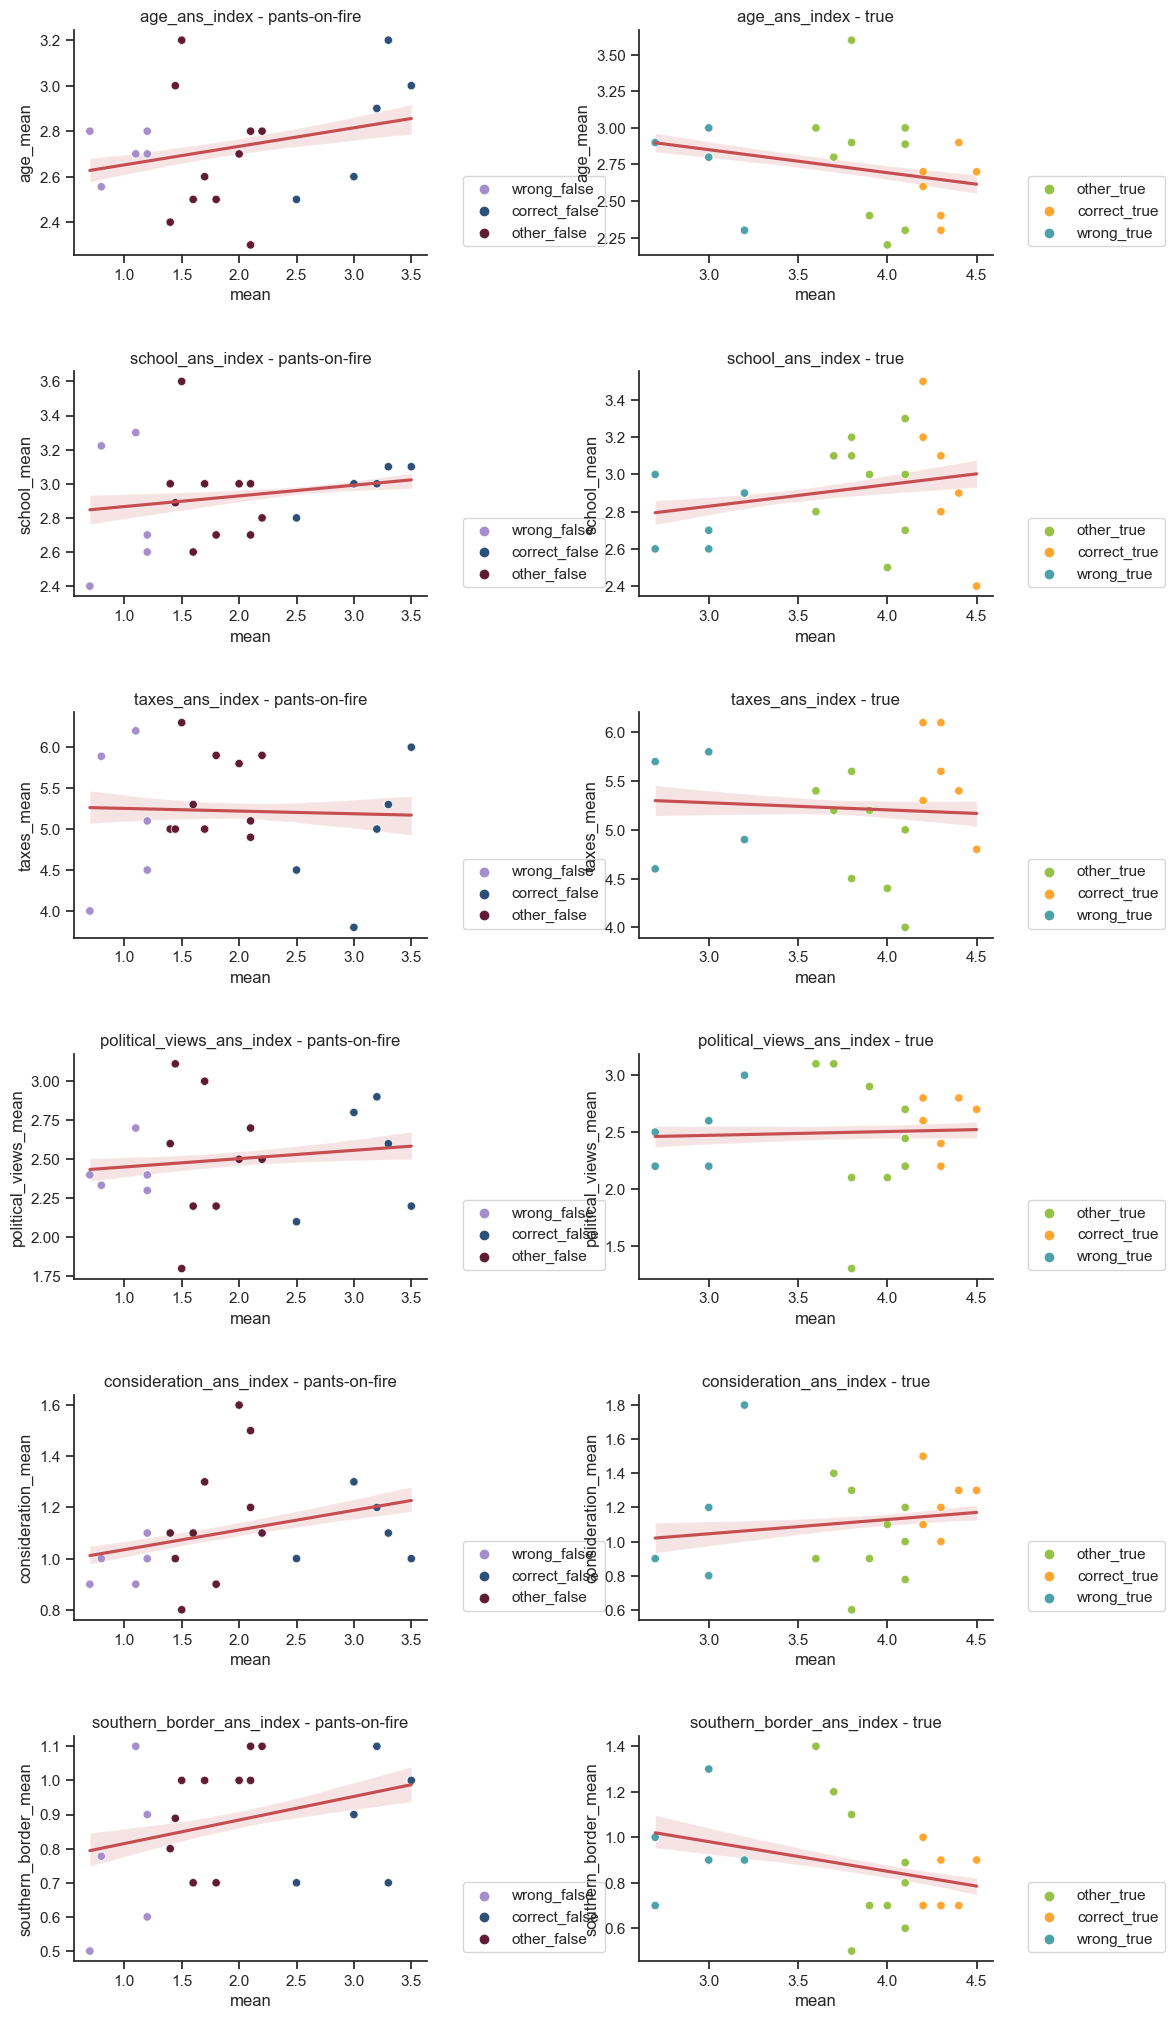

In [215]:
fig, ax = plt.subplots(6,2, figsize=(10,20))

fig.tight_layout(h_pad=5.0, w_pad=10.0)

i = -1

for dimensione in dim_regressione[0]:
        print(dimensione)
        i += 1        
        for sovra in ["pants-on-fire","true"]:
                
                if sovra == "true":
                        j = 1
                else:
                        j = 0
                        
                                
                sub = df_for_Q1[df_for_Q1["doc_fact_check_ground_truth_label"] == sovra]
                
                test = { "correct_true" : "#FFA630",
                        "other_true": "#95C247",
                        "wrong_true": "#4DA1A9",
                        "correct_false" : "#2E5077",
                        "other_false": "#611C35",
                        "wrong_false": "#A68DCC"
                        
                }
                
                sns.regplot(x="mean", 
                                y=sub[dimensione[:-10]+"_mean"], 
                                data=sub,
                                ax=ax[i,j],
                                scatter_kws={'s':0},
                                color="r"
                                )
                
                sns.scatterplot(x="mean", 
                                y=sub[dimensione[:-10]+"_mean"], 
                                hue = "quartile",
                                palette=test,
                                data=sub,
                                ax=ax[i,j]
                                )
                ax[i,j].set_title(str(dimensione) + " - " + sovra)
                ax[i,j].legend(bbox_to_anchor=(1.1, 0.35), loc='upper left', borderaxespad=0)
           
plt.show()

In [216]:
sub = df_for_Q1[df_for_Q1["sovra"] != "other"]

for dimensione in dimensioni_da_analizzare_per_regressione_2:
    sub[dimensione[:-10]+"_mean"] = 0

for statement in sub["doc_id"].unique():
    #sovra = sub[sub["doc_id"] == statement]["sovra"].unique()[0]  
    for dim in dimensioni_da_analizzare_per_regressione_2:
        mean = np.asarray(sub[sub["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_for_Q1.loc[df_for_Q1["doc_id"] == statement, dim[:-10]+"_mean"] = mean 

C:\Users\gabri\AppData\Local\Temp\ipykernel_30172\1617762291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[dimensione[:-10]+"_mean"] = 0


s_info_1_ans_index
s_info_3_v2_ans_index
s_info_4_ans_index
s_info_5_ans_index
s_info_6_ans_index
s_info_7_ans_index
s_com_1_v2_ans_index
s_com_2_ans_index


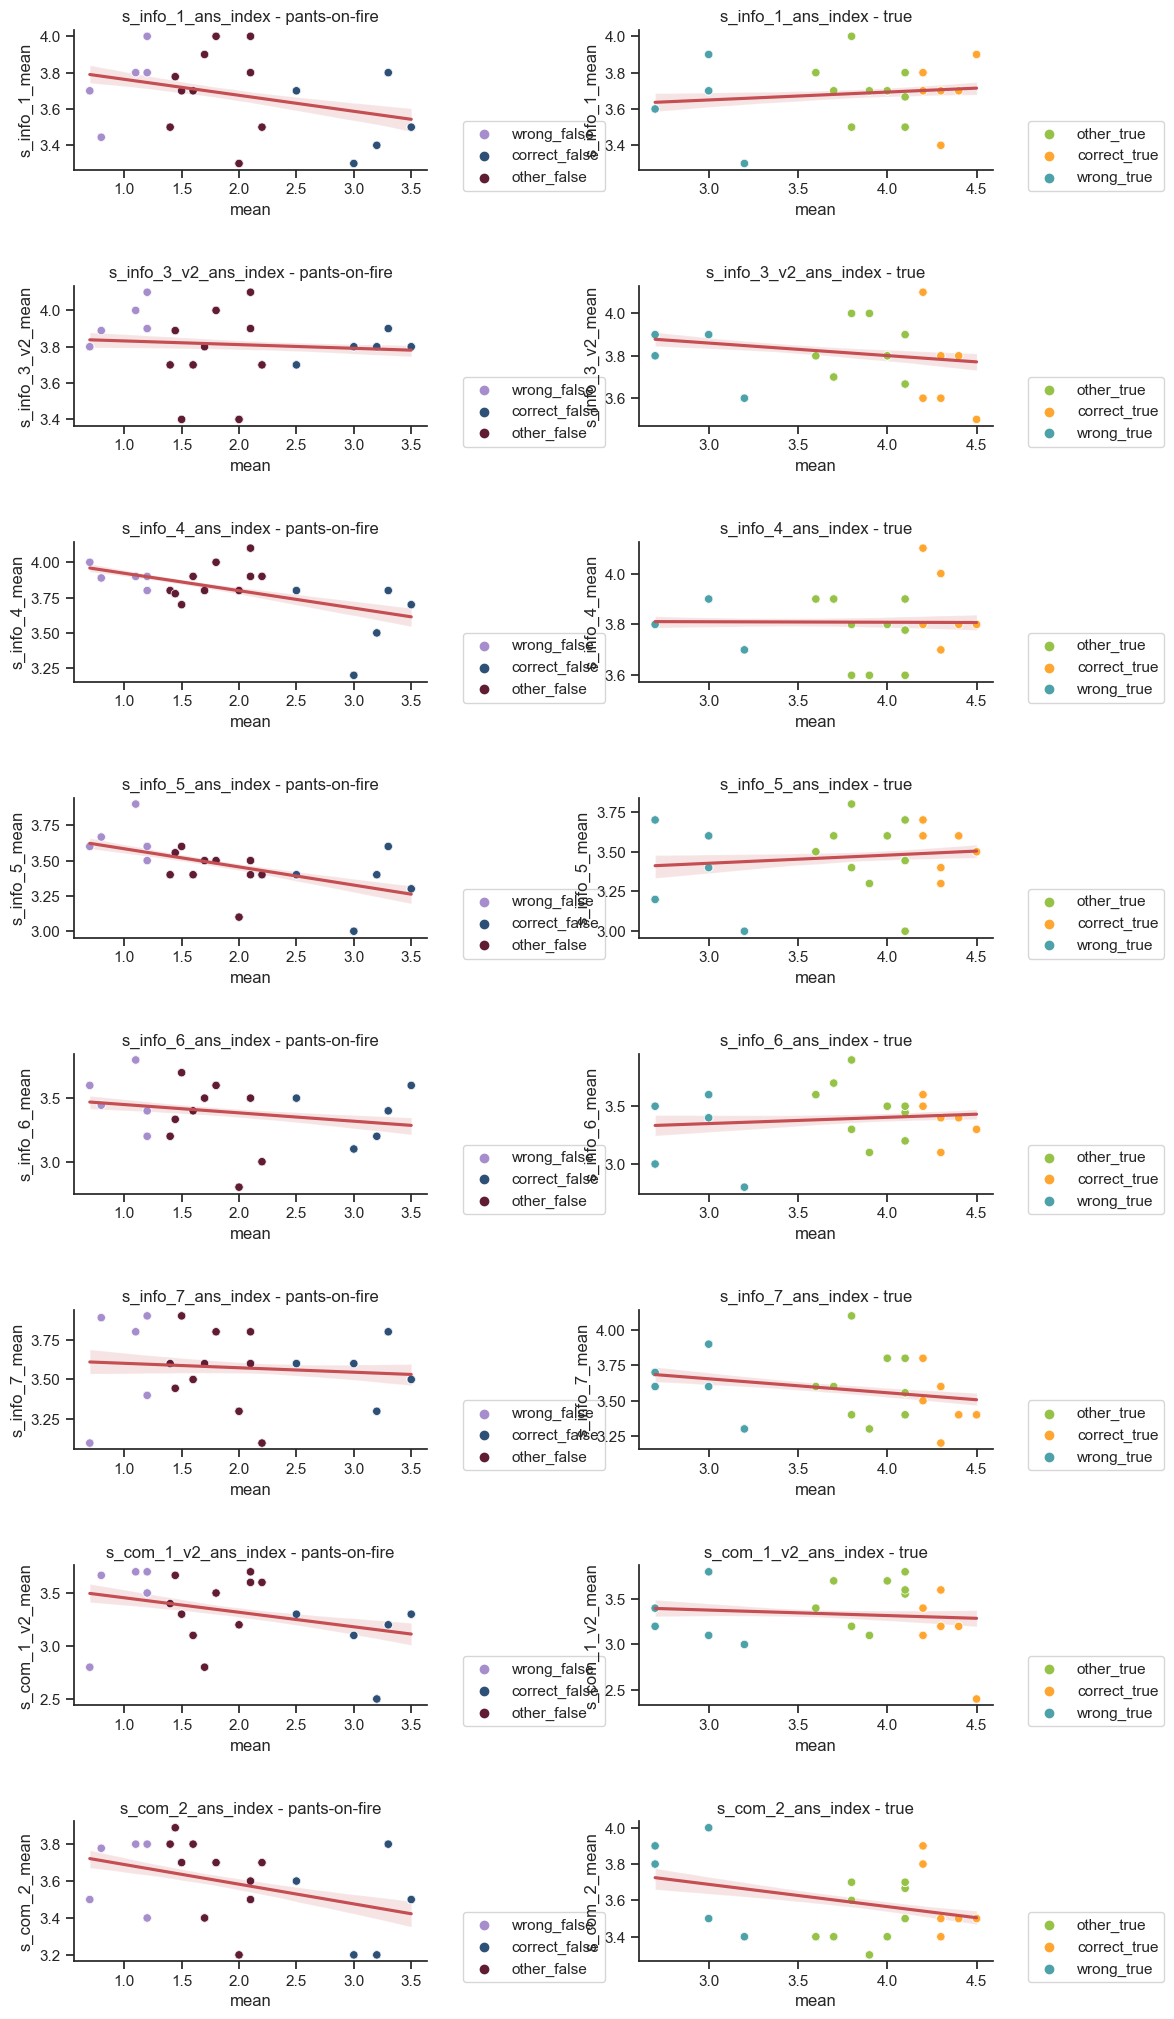

In [217]:
fig, ax = plt.subplots(8,2, figsize=(10,20))

fig.tight_layout(h_pad=5.0, w_pad=10.0)

i = -1

for dimensione in dim_regressione[1]:
        print(dimensione)
        i += 1        
        for sovra in ["pants-on-fire","true"]:
                
                if sovra == "true":
                        j = 1
                else:
                        j = 0
                        
                                
                sub = df_for_Q1[df_for_Q1["doc_fact_check_ground_truth_label"] == sovra]
                
                test = { "correct_true" : "#FFA630",
                        "other_true": "#95C247",
                        "wrong_true": "#4DA1A9",
                        "correct_false" : "#2E5077",
                        "other_false": "#611C35",
                        "wrong_false": "#A68DCC"
                        
                }
                
                sns.regplot(x="mean", 
                                y=sub[dimensione[:-10]+"_mean"], 
                                data=sub,
                                ax=ax[i,j],
                                scatter_kws={'s':0},
                                color="r"
                                )
                
                sns.scatterplot(x="mean", 
                                y=sub[dimensione[:-10]+"_mean"], 
                                hue = "quartile",
                                palette=test,
                                data=sub,
                                ax=ax[i,j]
                                )
                ax[i,j].set_title(str(dimensione) + " - " + sovra)
                ax[i,j].legend(bbox_to_anchor=(1.1, 0.35), loc='upper left', borderaxespad=0)
           
plt.show()

In [218]:
sub = df_for_Q1[df_for_Q1["sovra"] != "other"]

for dimensione in dimensioni_da_analizzare_per_regressione_3:
    sub[dimensione[:-10]+"_mean"] = 0

for statement in sub["doc_id"].unique():
    #sovra = sub[sub["doc_id"] == statement]["sovra"].unique()[0]  
    for dim in dimensioni_da_analizzare_per_regressione_3:
        mean = np.asarray(sub[sub["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_for_Q1.loc[df_for_Q1["doc_id"] == statement, dim[:-10]+"_mean"] = mean 

C:\Users\gabri\AppData\Local\Temp\ipykernel_30172\3355084330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[dimensione[:-10]+"_mean"] = 0


k_info_1_ans_index
k_info_2_ans_index
k_info_3_ans_index
k_crea_2_ans_index
k_ai_2_ans_index
k_ai_4_ans_index


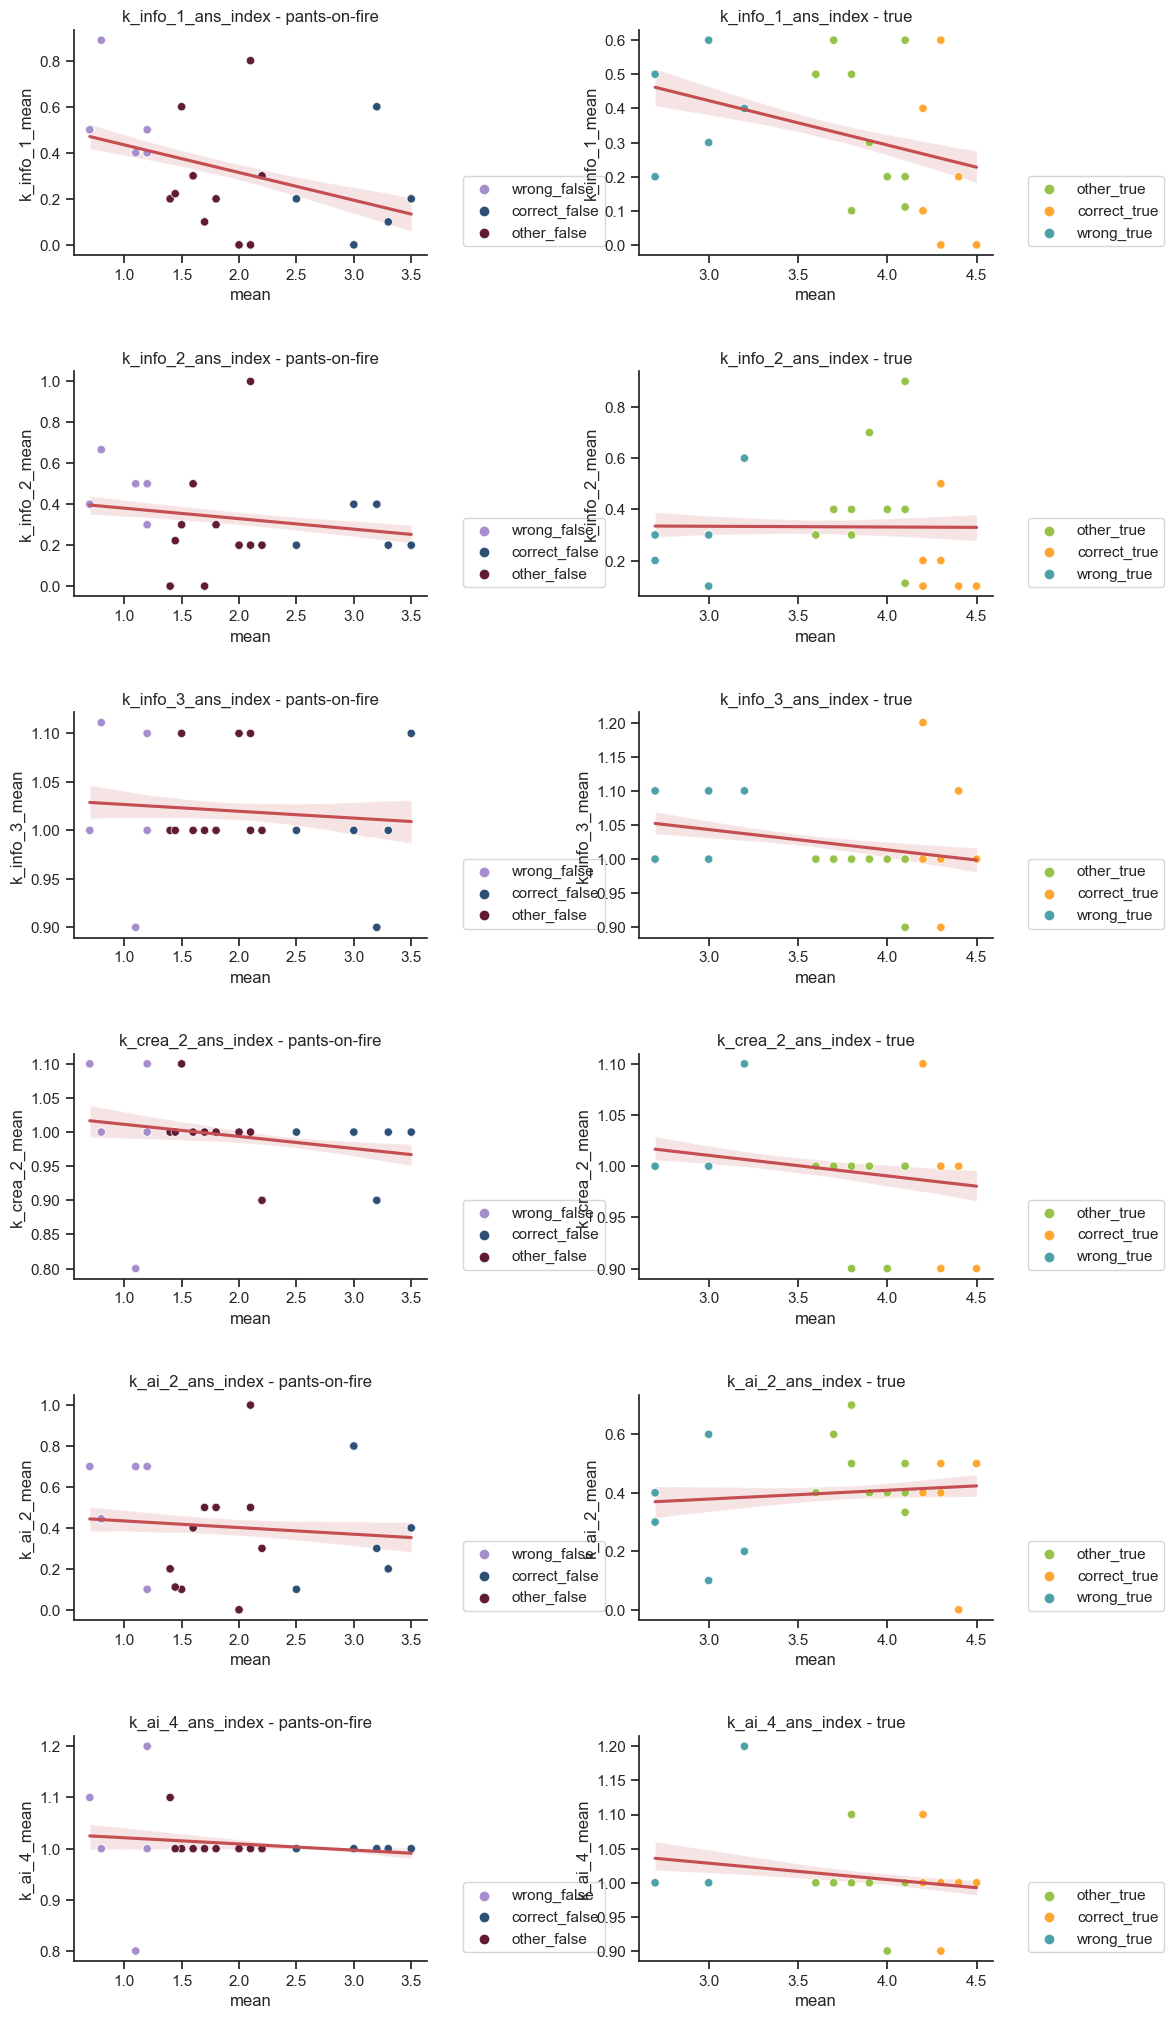

In [219]:
fig, ax = plt.subplots(6,2, figsize=(10,20))

fig.tight_layout(h_pad=5.0, w_pad=10.0)

i = -1

for dimensione in dim_regressione[2]:
        print(dimensione)
        i += 1        
        for sovra in ["pants-on-fire","true"]:
                
                if sovra == "true":
                        j = 1
                else:
                        j = 0
                        
                                
                sub = df_for_Q1[df_for_Q1["doc_fact_check_ground_truth_label"] == sovra]
                
                test = { "correct_true" : "#FFA630",
                        "other_true": "#95C247",
                        "wrong_true": "#4DA1A9",
                        "correct_false" : "#2E5077",
                        "other_false": "#611C35",
                        "wrong_false": "#A68DCC"
                        
                }
                
                sns.regplot(x="mean", 
                                y=sub[dimensione[:-10]+"_mean"], 
                                data=sub,
                                ax=ax[i,j],
                                scatter_kws={'s':0},
                                color="r"
                                )
                
                sns.scatterplot(x="mean", 
                                y=sub[dimensione[:-10]+"_mean"], 
                                hue = "quartile",
                                palette=test,
                                data=sub,
                                ax=ax[i,j]
                                )
                ax[i,j].set_title(str(dimensione) + " - " + sovra)
                ax[i,j].legend(bbox_to_anchor=(1.1, 0.35), loc='upper left', borderaxespad=0)
           
plt.show()

## analisi quartili 

In [235]:
l = list(df_for_Q1[df_for_Q1["worker_id"] == worker]["quartile"])
l = [value for value in l if (value != "other" and value != "other_true" and value != "other_false")]
len(l)

2

<Axes: ylabel='Count'>

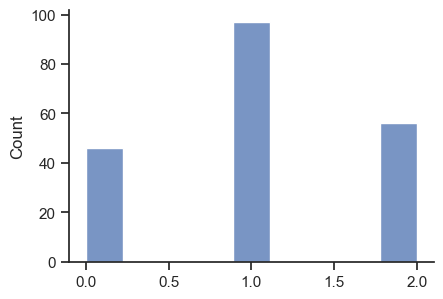

In [246]:
quantità = []
for worker in df_for_Q1["worker_id"].unique():
    l = list(df_for_Q1[df_for_Q1["worker_id"] == worker]["quartile"])
    l = [value for value in l if (value != "other" and value != "other_true" and value != "other_false")]
    quantità.append(len(l))
sns.histplot(quantità)

## scarto

In [255]:
df_for_Q1.head()

worker_id  \
0  55b645b1fdf99b1c02906872   
1  55b645b1fdf99b1c02906872   
2  55b645b1fdf99b1c02906872   
3  55b645b1fdf99b1c02906872   
4  55b645b1fdf99b1c02906872   

                                              doc_id  \
0  joni-ernst-target-describing-11th-hour-obama-r...   
1  gop-challenger-overstates-parole-boards-record...   
2  greene-twists-logic-and-facts-pedophilia-charg...   
3  barnes-partially-right-claim-johnson-has-recei...   
4  david-jolly-says-kathleen-peters-wont-take-sta...   

  doc_fact_check_ground_truth_label  doc_fact_check_ground_truth_value  \
0                       mostly-true                                4.0   
1                             false                                1.0   
2                     pants-on-fire                                0.0   
3                         half-true                                3.0   
4                       barely-true                                2.0   

           sovra     quartile  doc_truthfulness_value  mean age_ans_index  \
0          other        other                     4.0   3.4           4.0   
1          other        other                     1.0   1.4           4.0   
2  pants-on-fire  wrong_false                     1.0   1.2           4.0   
3          other        other                     1.0   2.6           4.0   
4          other        other                     4.0   2.7           4.0   

  age_ans_label  ... s_info_6_mean s_info_7_mean s_com_1_v2_mean s_com_2_mean  \
0         51-80  ...           NaN           NaN             NaN          NaN   
1         51-80  ...           NaN           NaN             NaN          NaN   
2         51-80  ...           3.2           3.4             3.5          3.4   
3         51-80  ...           NaN           NaN             NaN          NaN   
4         51-80  ...           NaN           NaN             NaN          NaN   

  k_info_1_mean k_info_2_mean k_info_3_mean k_crea_2_mean k_ai_2_mean  \
0           NaN           NaN           NaN           NaN         NaN   
1           NaN           NaN           NaN           NaN         NaN   
2           0.4           0.3           1.1           1.0         0.1   
3           NaN           NaN           NaN           NaN         NaN   
4           NaN           NaN           NaN           NaN         NaN   

  k_ai_4_mean  
0         NaN  
1         NaN  
2         1.0  
3         NaN  
4         NaN  

[5 rows x 76 columns]

In [260]:
df_for_Q1["scarto"] = 0
for row in df_for_Q1.index:
    df_for_Q1.loc[row,"scarto"] = abs(df_for_Q1.loc[row,"doc_truthfulness_value"] - df_for_Q1.loc[row,"doc_fact_check_ground_truth_value"])

In [262]:
df_for_Q1["scarto_medio"] = 0
for w in df_for_Q1["worker_id"].unique():
    df_for_Q1.loc[df_for_Q1["worker_id"] == w, "scarto_medio"] = df_for_Q1[df_for_Q1["worker_id"] == w]["scarto"].mean()
    

In [265]:
analisi_scarto = df_for_Q1.drop_duplicates(subset=["worker_id"])

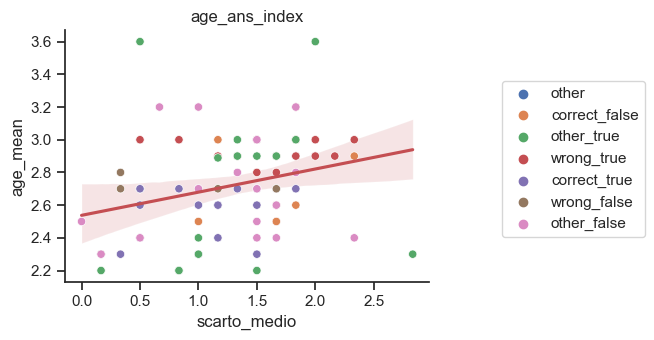

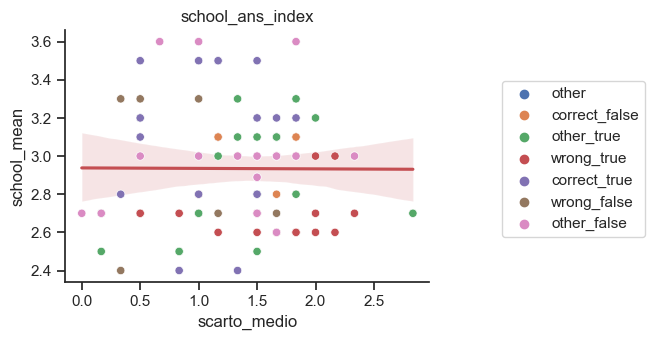

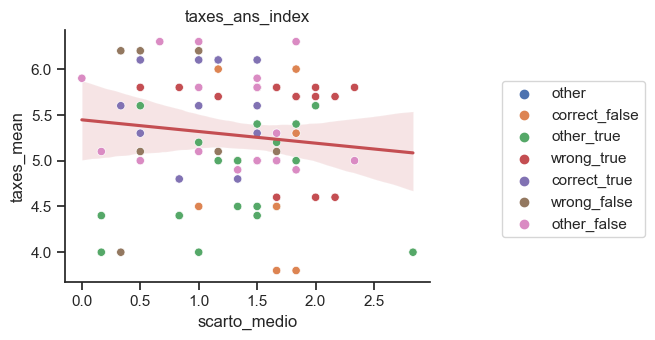

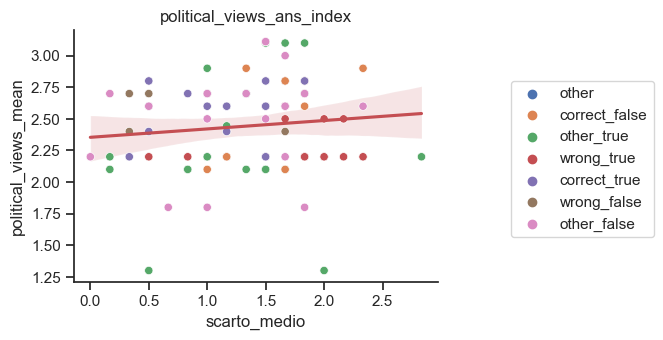

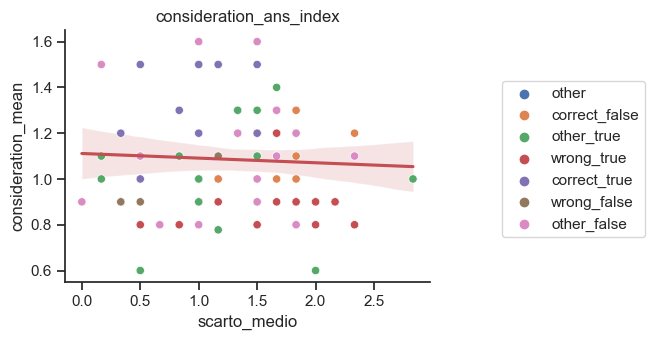

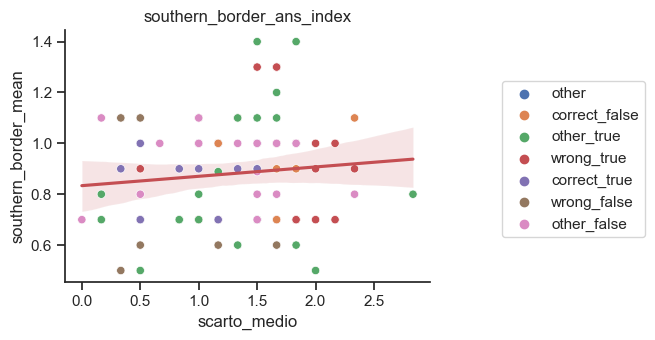

In [279]:
for dimensione in dim_regressione[0]:
                                
    sub = analisi_scarto
       
    sns.regplot(x="scarto_medio", 
                    y=sub[dimensione[:-10]+"_mean"], 
                    data=sub,
                    #ax=ax[i],
                    scatter_kws={'s':0},
                    color="r"
                    )
    
    sns.scatterplot(x="scarto_medio", 
                    y=sub[dimensione[:-10]+"_mean"], 
                    hue = "quartile",
                
                    data=sub,
                    #ax=ax[i]
                    )
    plt.title(str(dimensione))
    plt.legend(bbox_to_anchor=(1.2, 0.8), loc='upper left', borderaxespad=0)
    plt.show()

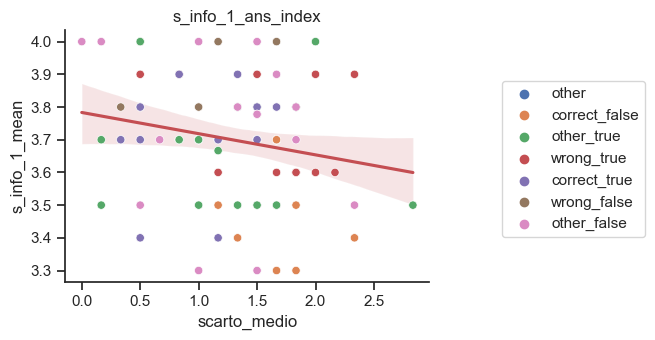

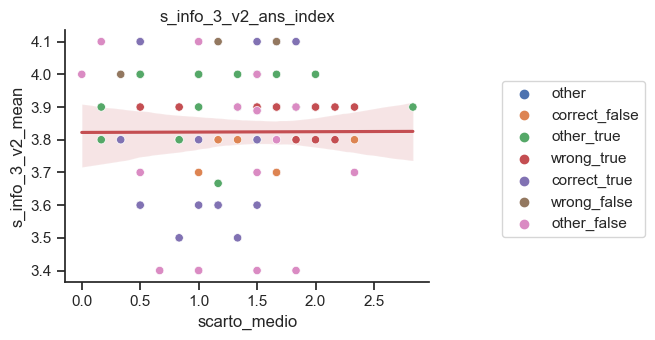

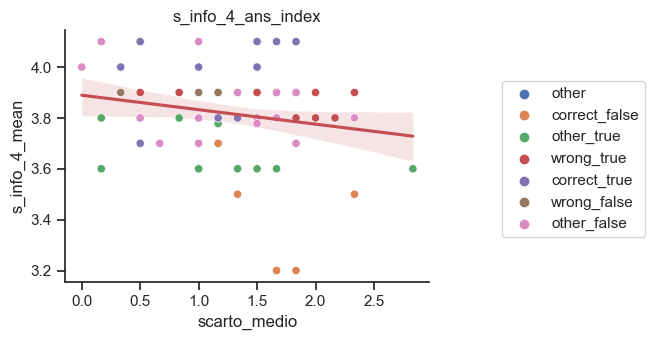

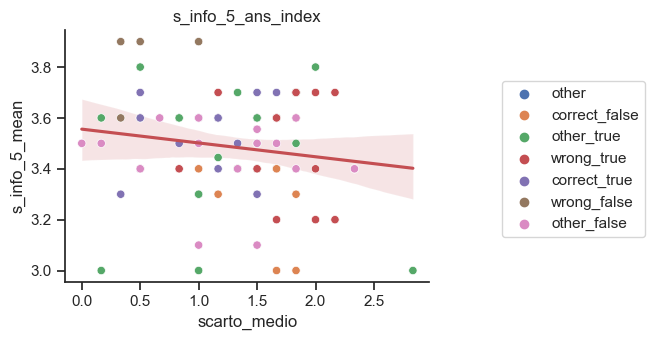

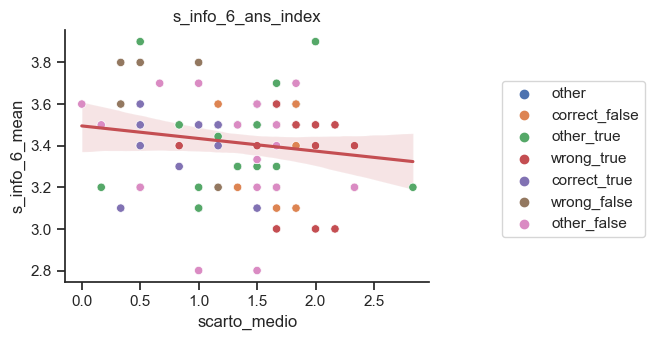

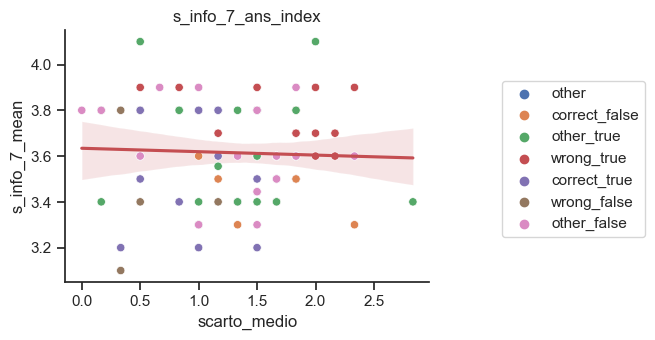

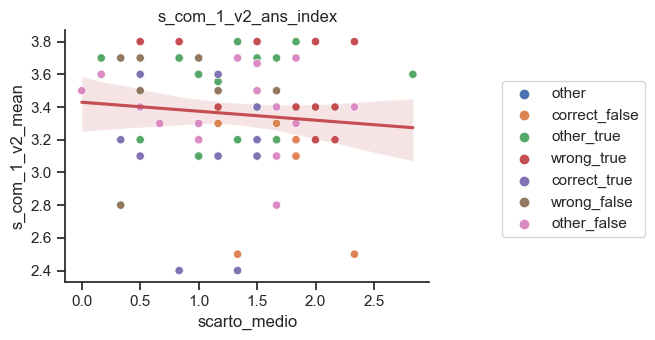

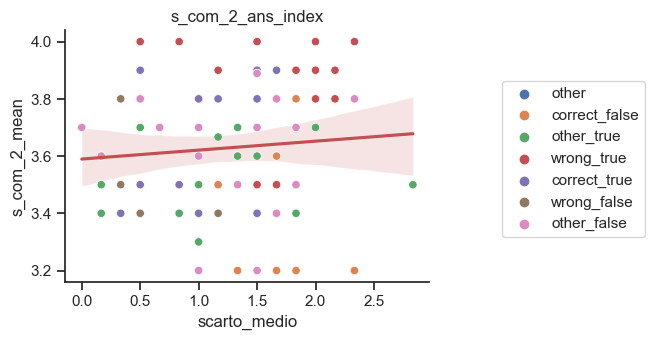

In [280]:
for dimensione in dim_regressione[1]:
                                
    sub = analisi_scarto
       
    sns.regplot(x="scarto_medio", 
                    y=sub[dimensione[:-10]+"_mean"], 
                    data=sub,
                    #ax=ax[i],
                    scatter_kws={'s':0},
                    color="r"
                    )
    
    sns.scatterplot(x="scarto_medio", 
                    y=sub[dimensione[:-10]+"_mean"], 
                    hue = "quartile",
                
                    data=sub,
                    #ax=ax[i]
                    )
    plt.title(str(dimensione))
    plt.legend(bbox_to_anchor=(1.2, 0.8), loc='upper left', borderaxespad=0)
    plt.show()

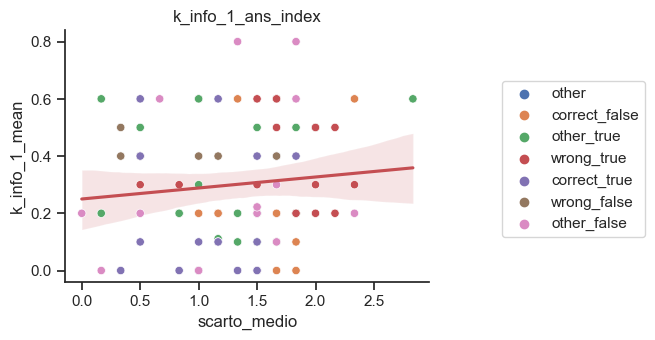

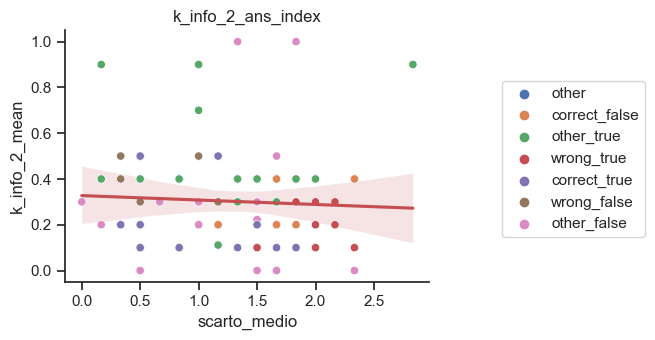

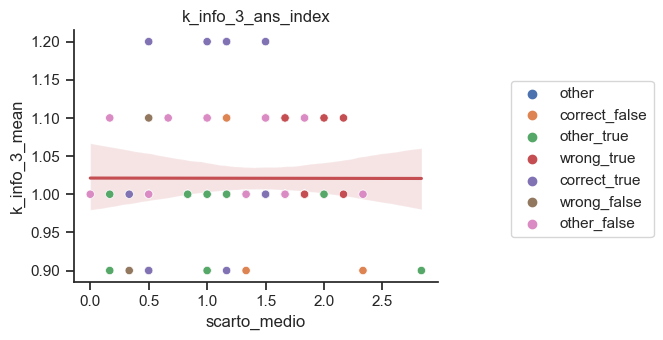

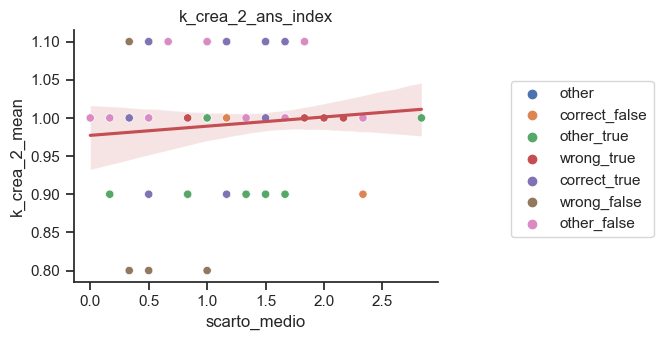

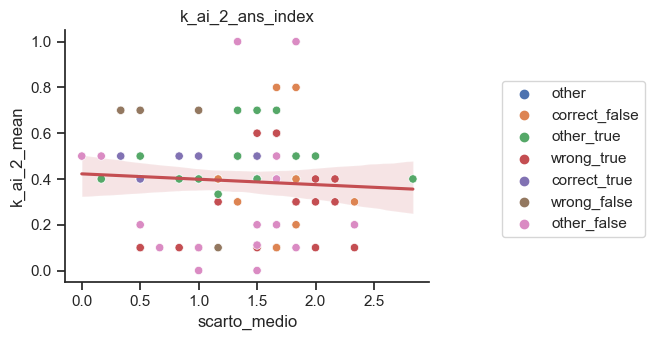

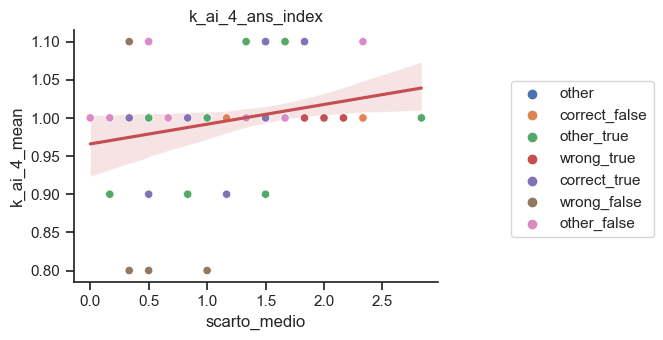

In [281]:
for dimensione in dim_regressione[2]:
                                
    sub = analisi_scarto
       
    sns.regplot(x="scarto_medio", 
                    y=sub[dimensione[:-10]+"_mean"], 
                    data=sub,
                    #ax=ax[i],
                    scatter_kws={'s':0},
                    color="r"
                    )
    
    sns.scatterplot(x="scarto_medio", 
                    y=sub[dimensione[:-10]+"_mean"], 
                    hue = "quartile",
                
                    data=sub,
                    #ax=ax[i]
                    )
    plt.title(str(dimensione))
    plt.legend(bbox_to_anchor=(1.2, 0.8), loc='upper left', borderaxespad=0)
    plt.show()

## worker medio

In [284]:
df_for_Q1[col]

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
1194    3.0
1195    3.0
1196    3.0
1197    3.0
1198    3.0
Name: age_ans_index, Length: 1193, dtype: object

In [295]:
for col in colonne:
    if col[-5:] == "index":
        mean = np.asarray(sub[col],dtype = np.float64).mean()
        print(col[:-10], " - ", mean, " - ", mapping[col[:-10]][str(round(mean))+".0"])
    

age  -  2.728643216080402  -  36-50
school  -  2.919597989949749  -  Four year college degree/bachelorâs degree
taxes  -  5.221105527638191  -  50,000$ to less than 75,000$
political_views  -  2.4974874371859297  -  Moderate
consideration  -  1.1105527638190955  -  Democrat
southern_border  -  0.8793969849246231  -  Disagree
s_info_1  -  3.6834170854271355  -  completely_true
s_info_3_v2  -  3.814070351758794  -  completely_true
s_info_4  -  3.809045226130653  -  completely_true
s_info_5  -  3.4673366834170856  -  slightly_true
s_info_6  -  3.391959798994975  -  slightly_true
s_info_7  -  3.577889447236181  -  completely_true
s_com_1_v2  -  3.3316582914572863  -  slightly_true
s_com_2  -  3.592964824120603  -  completely_true
k_info_1  -  0.32160804020100503  -  definetely_untrue
k_info_2  -  0.3316582914572864  -  definetely_untrue
k_info_3  -  1.020100502512563  -  definetely_true
k_crea_2  -  0.9949748743718593  -  definetely_true
k_ai_2  -  0.4020100502512563  -  definetely_untru